# Predicting Air Delays
Notebook II: Exploratory Data Analysis (EDA) & Feature Engineering
----

Thank you for your review of my code notebook.
This notebook's goal is to analyze and prepare the dataset for exposure on a Machine Learning algorithm.

---
#### Problem Statement: 
Both travelers and airlines find delays frustrating and costly. This project attempts to be able to predict the probability of a commercial flight delay for any flight in the United States.

---

#### MVP:
My product will be a small lightweight application run on `streamlit` platform for proof-of-concept where a user can find the probability of their desired flight having a delay, how long the delay may be, and how much will the delay cost the user in _lost time_ at the destination.

Since we have labels on all our data, the model the app will be based on is a supervised multi-class classification machine learning model.

---
# EDA 

The primary challenge in this notebook is making sense of what will matter to a machine learning algorithm. At the end of this notebook will will have a final processed set of data to work our models on. 

The notebook is structured as follows.<br> 
**Notebook II: EDA and Preprocessing **
>1. Setup/Imports
>2. Load data
>3. EDA
>4. Feature engineering and selection. 
>5. Save the final CSV and discuss next steps. 

The processed dataframe will be saved on a new file by the end of this notebook and called into the subsequent notebook EDA for readability.

The notebooks in this project are: <br>
I. Intake and cleaning<br>
**II. EDA and preprocessing**<br>
III. Modeling and predictions<br>
IV. App<br>

---

## 1. Library imports
----
Load our analytical libraries and load our previously saved dataset. 


In [206]:
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
os.chdir('/Volumes/lacie/data_ingestion/capstone_hopper')

In [208]:
pd.set_option('display.max_columns', None)

## 2. Load Dataset
---


In [209]:
flights = pd.read_csv('sample_cleaned.csv')

In [210]:
flights.shape

(2735655, 26)

In [211]:
flights.isnull().sum()

year                   0
month                  0
day_of_month           0
day_of_week            0
fl_date                0
airline                0
tail_num               0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

## 3. Exploratory Data Analysis:
---
This section of the notebook deals with data explorations. 

Our working definition of a **_delay_** is a flight arriving at the destination airport 15 minute after their scheduled arrival. This also means that we consider an on-time arrival is **any arrival that is within 15 minutes of it's scheduled arrival time**. This is the same definition that reporting airlines are required to adopt according to the the Department of Transportation. 

`'arr_delay'` is our target variable. 


In [212]:
flights.head(3)

,year,month,day_of_month,day_of_week,fl_date,airline,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,Sep,4,Fri,2020-09-04,Southwest Airlines,N8529Z,363,MDW,"Chicago, IL",DTW,"Detroit, MI",1350,1404.0,14.0,1600,1555.0,0.0,0.0,completed_flight,228.0,0.0,0.0,0.0,0.0,0.0
1,2017,Feb,10,Fri,2017-02-10,American Airlines,N3KJAA,2586,ORD,"Chicago, IL",SFO,"San Francisco, CA",1659,1702.0,3.0,1942,2006.0,24.0,0.0,completed_flight,1846.0,0.0,0.0,24.0,0.0,0.0
2,2017,May,7,Sun,2017-05-07,Skywest Airlines,N614SK,4646,TUS,"Tucson, AZ",LAX,"Los Angeles, CA",1704,1841.0,97.0,1850,2032.0,102.0,0.0,completed_flight,451.0,0.0,96.0,5.0,0.0,1.0


### EDA: Delay class balance
---
First look at the balance of classes. 

In [213]:
delayed = flights[flights['arr_delay'] > 15]
delayed.shape[0]

1333423

In [214]:
ontime = flights[flights['arr_delay']==0]
ontime.shape[0]

1345806

In [215]:
print(f'The balance of delayed to on-time flights is: {round(delayed.shape[0]/ontime.shape[0], 3)}')

The balance of delayed to on-time flights is: 0.991


The ratio of delayed to on-time is nearly even. That is, it is nearly 1. 
We have approximately 1.4 million examples of both on-time flights, those of delayed flights. 

In [216]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735655 entries, 0 to 2735654
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                object 
 2   day_of_month         int64  
 3   day_of_week          object 
 4   fl_date              object 
 5   airline              object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin               object 
 9   origin_city_name     object 
 10  dest                 object 
 11  dest_city_name       object 
 12  crs_dep_time         int64  
 13  dep_time             float64
 14  dep_delay            float64
 15  crs_arr_time         int64  
 16  arr_time             float64
 17  arr_delay            float64
 18  cancelled            float64
 19  cancellation_code    object 
 20  distance             float64
 21  carrier_delay        float64
 22  weather_delay        float64
 23  nas_delay            float64
 24

### EDA: Categorical column datatypes.
---
Pandas infers the data types on import to our workspace. The following will convert a few of our categorical data values from numbers to strings to ease the EDA process.

In [217]:
categorical = {'year' : str, 'month' : str, 'day_of_month': str, 'day_of_week': str, 'tail_num': str,
              'op_carrier_fl_num': str, 'crs_dep_time': str, 'dep_time' : str, 'crs_arr_time': str, 'arr_time' : str}

In [218]:
flights = flights.astype(categorical).copy()

In [219]:
flights.describe()

,dep_delay,arr_delay,cancelled,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06,2.735655e+06
mean,3.100504e+01,3.247934e+01,2.062614e-02,8.342171e+02,1.059801e+01,1.848742e+00,7.437584e+00,5.952103e-02,1.255611e+01
std,6.864409e+01,6.797221e+01,1.421292e-01,6.018418e+02,4.634075e+01,2.118880e+01,2.504889e+01,2.390667e+00,3.807835e+01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,6.790000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.900000e+01,3.900000e+01,0.000000e+00,1.069000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,3.890000e+03,3.864000e+03,1.000000e+00,5.812000e+03,3.864000e+03,2.475000e+03,1.508000e+03,1.048000e+03,2.321000e+03


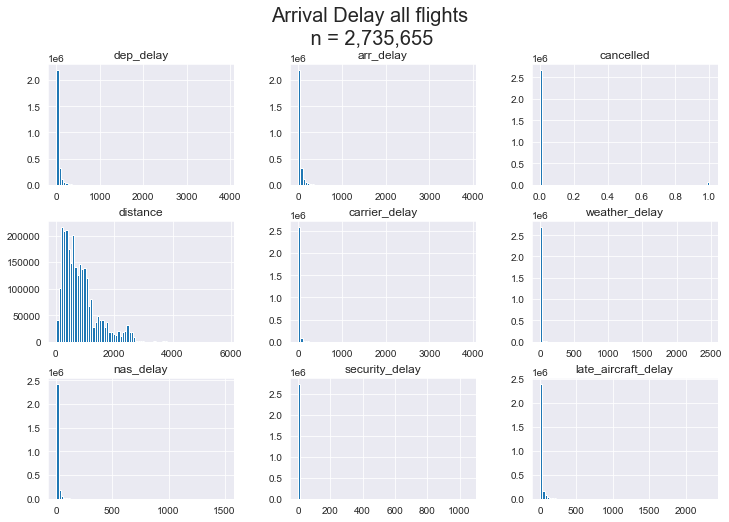

In [220]:
sns.set_style('darkgrid')
flights.hist(bins = 75, figsize = (12,8));
plt.suptitle(f'Arrival Delay all flights \n n = {flights.shape[0] :,} ', size = 20);
plt.savefig("../Assets/overall_delays_hist_log.pdf", bbox_inches="tight")

Not very useful since the most of our data lives in the first few buckets.
Note, all but one chart are in the minutes scale. The `distance` feature is in statute miles. 

Finally lets get the `fl_date` column into a date time format.

In [221]:
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

In [222]:
flights.dtypes

year                           object
month                          object
day_of_month                   object
day_of_week                    object
fl_date                datetime64[ns]
airline                        object
tail_num                       object
op_carrier_fl_num              object
origin                         object
origin_city_name               object
dest                           object
dest_city_name                 object
crs_dep_time                   object
dep_time                       object
dep_delay                     float64
crs_arr_time                   object
arr_time                       object
arr_delay                     float64
cancelled                     float64
cancellation_code              object
distance                      float64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
dtype: objec

### EDA: Distribution of all delayed flights
---
Taking a first level view of all flights in the sample with positive values in `arrival_delay` column. 

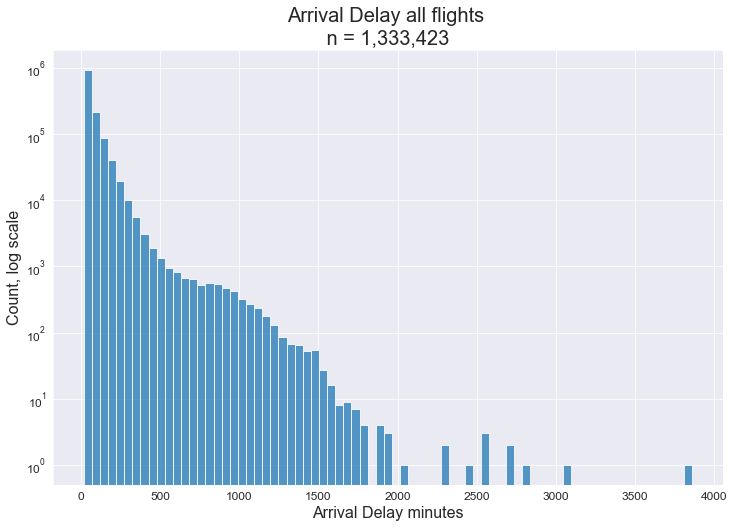

In [87]:
plt.figure(figsize = (12,8));
sns.set_style('darkgrid')
sns.histplot(delayed['arr_delay'], bins = 75);
plt.yscale('log')
plt.title(f'Arrival Delay all flights \n n = {delayed.shape[0] :,} ', size = 20);
plt.xlabel('Arrival Delay minutes', size=16);
plt.xticks(fontsize = 12);
plt.ylabel('Count, log scale', size= 16);
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_hist_log.pdf", bbox_inches="tight")

The tail of this chart shows delay times that are in the thousands of minutes. A 24 hour period has 1,440 minutes. granted most of data is well below, we still have troubling occurrences of extremely long delays. <br>
I will dissect the dateset into 4-hour chunks and look at the counts of delays

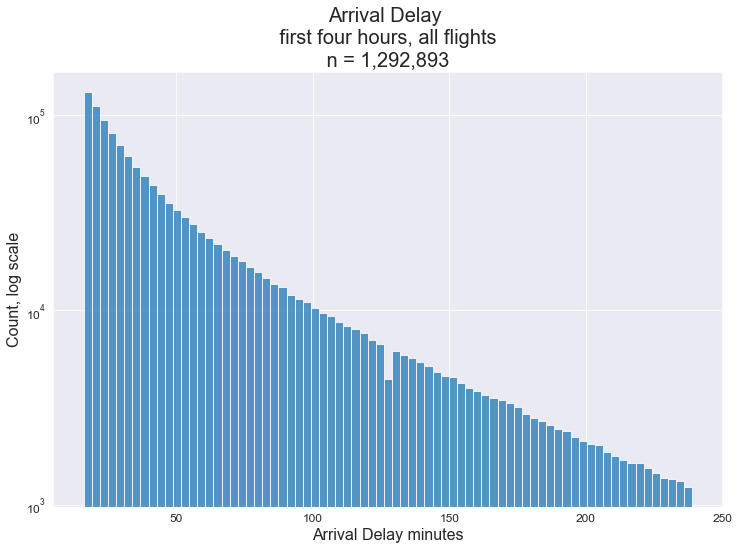

In [88]:
plt.figure(figsize = (12,8));
sns.set_style('darkgrid')
sns.histplot(delayed[delayed['arr_delay'] < 240]['arr_delay'], bins = 75);
plt.yscale('log')
plt.title(f'Arrival Delay \n first four hours, all flights \n n = {delayed[delayed["arr_delay"] < 240].shape[0] :,} ', size = 20);
plt.xlabel('Arrival Delay minutes', size=16);
plt.xticks(fontsize = 12);
plt.ylabel('Count, log scale', size= 16);
plt.yticks(fontsize = 12);
plt.savefig("../Assets/first_four_hours_delays_hist_log.pdf", bbox_inches="tight")

Since the value of `n` has not reduced by much, we can state that all but 40,000 flights that had delays were mostly 'short' delays. This indicates that most flight delays are four hours or less.

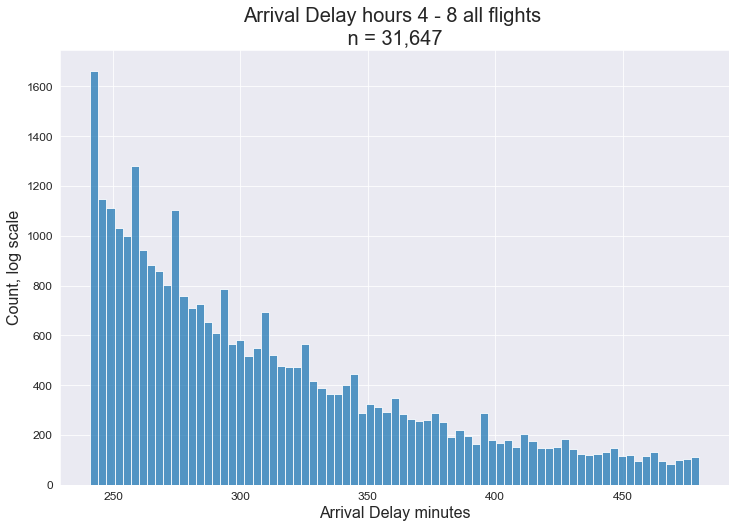

In [89]:
plt.figure(figsize = (12,8));
sns.set_style('darkgrid')
sns.histplot(delayed[(delayed['arr_delay'] > 240) & (delayed['arr_delay']<=480)]['arr_delay'], bins = 75);
#plt.yscale('log')
plt.title(f'Arrival Delay hours 4 - 8 all flights \n n = {delayed[(delayed["arr_delay"] > 240) & (delayed["arr_delay"]<=480)].shape[0] :,} ', size = 20);
plt.xlabel('Arrival Delay minutes', size=16);
plt.xticks(fontsize = 12);
plt.ylabel('Count, log scale', size= 16);
plt.yticks(fontsize = 12);
plt.savefig("../Assets/hours_4-8_delays_hist_log.pdf", bbox_inches="tight")

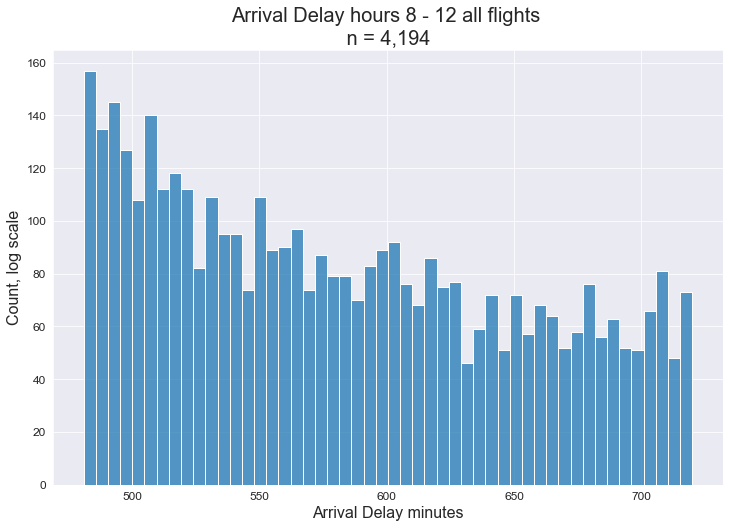

In [90]:
plt.figure(figsize = (12,8));
sns.set_style('darkgrid')
sns.histplot(delayed[(delayed['arr_delay'] > 480) & (delayed['arr_delay']<=720)]['arr_delay'], bins = 50);
#plt.yscale('log')
plt.title(f'Arrival Delay hours 8 - 12 all flights \n n = {delayed[(delayed["arr_delay"] > 480) & (delayed["arr_delay"]<=720)].shape[0] :,} ', size = 20);
plt.xlabel('Arrival Delay minutes', size=16);
plt.xticks(fontsize = 12);
plt.ylabel('Count, log scale', size= 16);
plt.yticks(fontsize = 12);
plt.savefig("../Assets/hours_8-12_delays_hist_log.pdf", bbox_inches="tight")

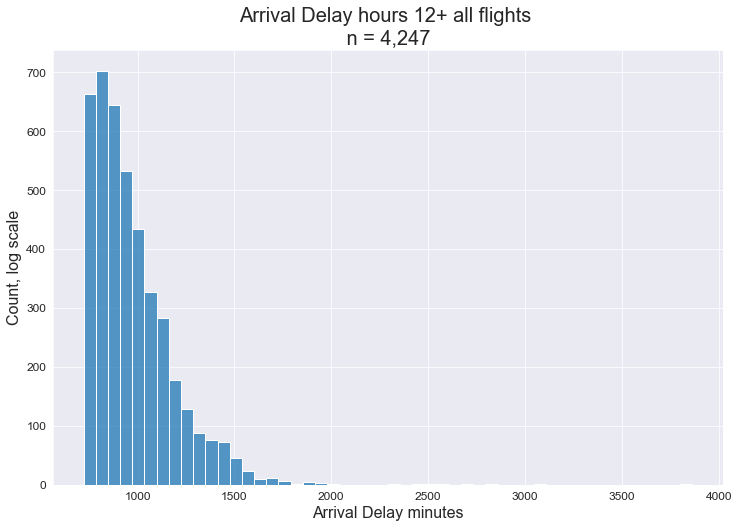

In [91]:
plt.figure(figsize = (12,8));
sns.set_style('darkgrid')
sns.histplot(delayed[delayed['arr_delay']>720]['arr_delay'], bins = 50);
#plt.yscale('log')
plt.title(f'Arrival Delay hours 12+ all flights \n n = {delayed[delayed["arr_delay"]> 720].shape[0] :,} ', size = 20);
plt.xlabel('Arrival Delay minutes', size=16);
plt.xticks(fontsize = 12);
plt.ylabel('Count, log scale', size= 16);
plt.yticks(fontsize = 12);
plt.savefig("../Assets/12+_delays_hist_log.pdf", bbox_inches="tight")

In [92]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735655 entries, 0 to 2735654
Data columns (total 26 columns):
 #   Column               Dtype         
---  ------               -----         
 0   year                 object        
 1   month                object        
 2   day_of_month         object        
 3   day_of_week          object        
 4   fl_date              datetime64[ns]
 5   airline              object        
 6   tail_num             object        
 7   op_carrier_fl_num    object        
 8   origin               object        
 9   origin_city_name     object        
 10  dest                 object        
 11  dest_city_name       object        
 12  crs_dep_time         object        
 13  dep_time             object        
 14  dep_delay            float64       
 15  crs_arr_time         object        
 16  arr_time             object        
 17  arr_delay            float64       
 18  cancelled            float64       
 19  cancellation_code    

### EDA: `fl_date`
---
This column contains a _string_ that should be converted to a date-time object to make further analysis available. 

In [93]:
delayed = flights[flights['arr_delay']>=15].set_index('fl_date')

In [94]:
mean_delay = delayed['arr_delay'].mean()

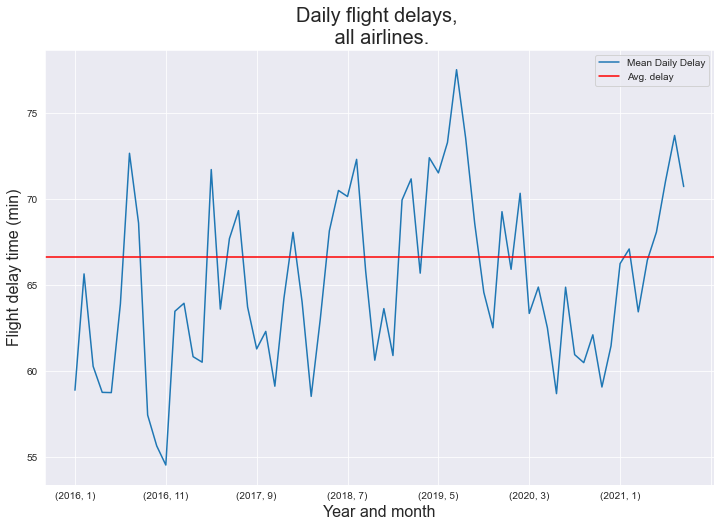

In [95]:
delayed.groupby(by= [delayed.index.year,delayed.index.month])['arr_delay'].mean().plot(kind = 'line', figsize = (12,8), grid = True, label = 'Mean Daily Delay');
#mark a line for the average of all flight delays in the set and highilight peaks above and below. 
sns.set_style('darkgrid')
plt.axhline(y=mean_delay, color='r', linestyle='-', label='Avg. delay')
plt.title('Daily flight delays, \n all airlines.', size = 20);
plt.ylabel('Flight delay time (min)', size = 16);
plt.xlabel('Year and month', size = 16)
plt.legend();
plt.savefig("../Assets/mean_daily_delay_line.pdf", bbox_inches="tight")

### EDA: Year
---
Beginning with the most macro level view of my categorical data, by `year`. 
The boxplot removes outliers. There were a lot of outliers. The reason for keeping outlier data in the dataset is because I intend on using a random forest model with won't require centering or regularization. 

     arr_delay                         
          size   min     max       mean
year                                   
2016    207213  16.0  1568.0  62.566948
2017    226987  16.0  1718.0  64.651293
2018    315660  16.0  2475.0  66.000656
2019    328207  16.0  2695.0  70.550707
2020    102210  16.0  3864.0  64.353566
2021    153146  16.0  2797.0  69.883869


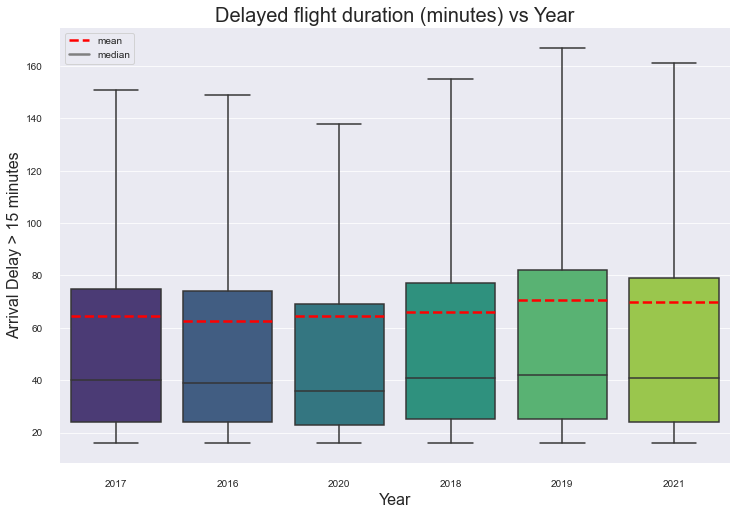

In [96]:
group1= delayed.groupby(['year']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group1)

meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')
sns.set_style('darkgrid')
plt.figure(figsize=(12,8));
plt.title('Delayed flight duration (minutes) vs Year', size = 20)
year = sns.boxplot(x="year", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
            meanprops = meanlineprops, palette ='viridis')

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='red', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Year', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_year_box.pdf", bbox_inches="tight")

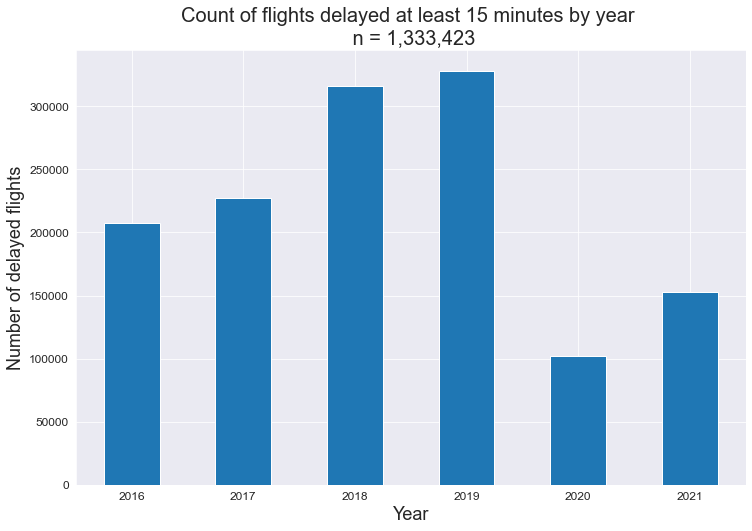

In [97]:
delayed['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,8));
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 15 minutes by year \n n = {delayed["year"].count() :,}', size = 20);
plt.xlabel('Year', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Number of delayed flights', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_year_bar_15_min.pdf", bbox_inches="tight")

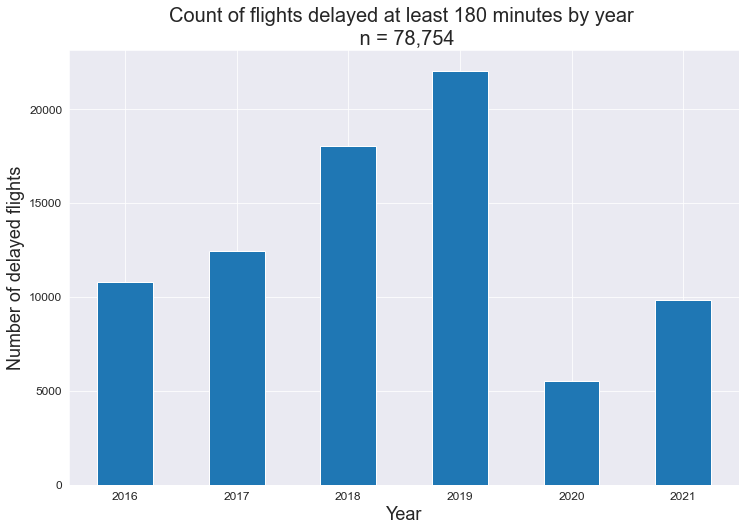

In [98]:
delayed[delayed['arr_delay']>=180]['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,8));
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 180 minutes by year \n n = {delayed[delayed["arr_delay"]>=180]["year"].count() :,}', size = 20);
plt.xlabel('Year', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Number of delayed flights', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_year_bar_180_min.pdf", bbox_inches="tight")

### EDA: Month
---

In [223]:
round(flights['month'].value_counts(normalize = True), 3)

Jul    0.103
Aug    0.101
Jun    0.096
Mar    0.091
Jan    0.087
May    0.084
Feb    0.082
Apr    0.080
Dec    0.075
Oct    0.070
Nov    0.066
Sep    0.065
Name: month, dtype: float64

      arr_delay                         
           size   min     max       mean
month                                   
Apr       98322  16.0  2322.0  67.085464
Aug      148559  16.0  2302.0  69.825908
Dec      107285  16.0  3069.0  64.460782
Feb      108468  16.0  2797.0  67.167598
Jan      111399  16.0  2536.0  65.966939
Jul      157668  16.0  3864.0  72.481144
Jun      148554  16.0  1890.0  69.611327
Mar      107692  16.0  2560.0  61.911238
May      112792  16.0  2715.0  66.761561
Nov       76001  16.0  1910.0  60.815292
Oct       83682  16.0  1933.0  61.422660
Sep       73001  16.0  1529.0  63.849701


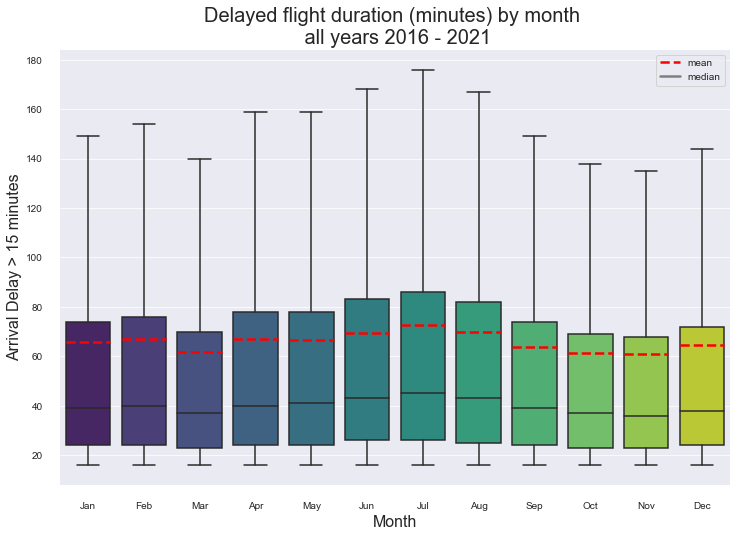

In [101]:
group2= delayed.groupby(['month']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group2)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
plt.title('Delayed flight duration (minutes) by month \n all years 2016 - 2021', size = 20)
year = sns.boxplot(x="month", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True, palette ='viridis',
            meanprops = meanlineprops, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='red', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Month', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_month_box.pdf", bbox_inches="tight")

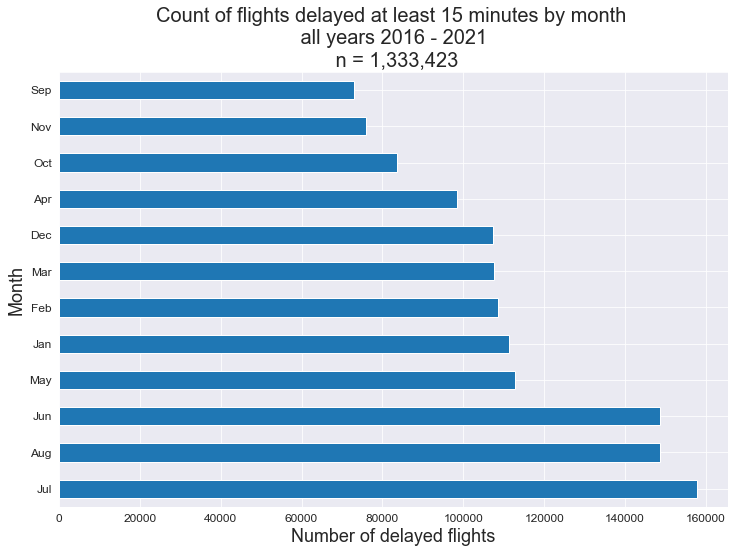

In [102]:
#counts of any delayed flight
round(delayed['month'].value_counts()).plot(kind = 'barh', figsize=(12,8))
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 15 minutes by month \n all years 2016 - 2021 \n n = {delayed[delayed["arr_delay"]>=15]["month"].count() :,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Month', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_month_bar_15_min.pdf", bbox_inches="tight")

#### Discussion: Summer months.
----
Traditionally, the summer travel season is the busiest season for airlines to operate flights. 
This means, for business and leisure customer segments there is a higher persistent historical chance of delay due to the increase in flights that are in the air system. 

### EDA: Day of the week. 
---
Next, I will want to take basic counts and measure delays as we did earlier with `year` and `month`. 
<br> 
Like the `month` variable, the data came over encoded with integers as mentioned above. 

            arr_delay                         
                 size   min     max       mean
day_of_week                                   
Fri            218321  16.0  3864.0  65.937871
Mon            206574  16.0  1888.0  68.864959
Sat            148612  16.0  1937.0  67.342953
Sun            188827  16.0  2033.0  67.632918
Thu            215385  16.0  3069.0  66.110569
Tue            175534  16.0  2715.0  66.026388
Wed            180170  16.0  2797.0  64.824216


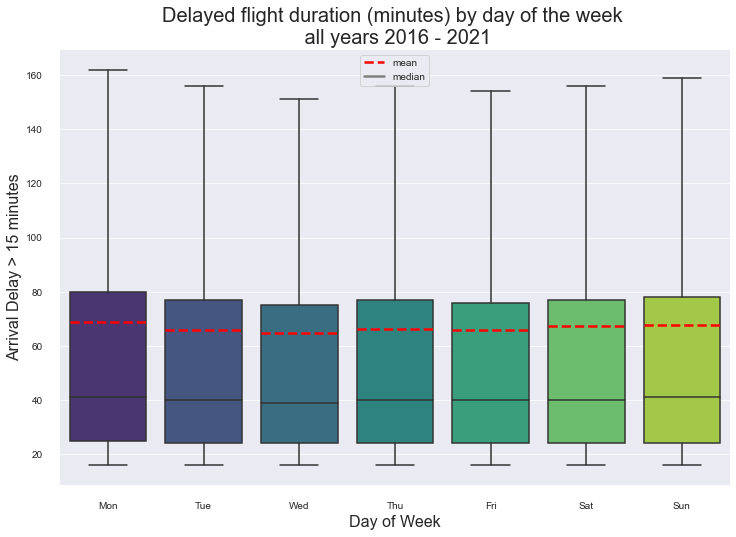

In [104]:
group3= delayed.groupby(['day_of_week']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group3)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')
plt.title('Delayed flight duration (minutes) by day of the week \n all years 2016 - 2021' , size = 20)
year = sns.boxplot(x="day_of_week", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True, palette = 'viridis',
            meanprops = meanlineprops, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri',
                                                'Sat', 'Sun'])

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='red', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Day of Week', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_daily_box.pdf", bbox_inches="tight")

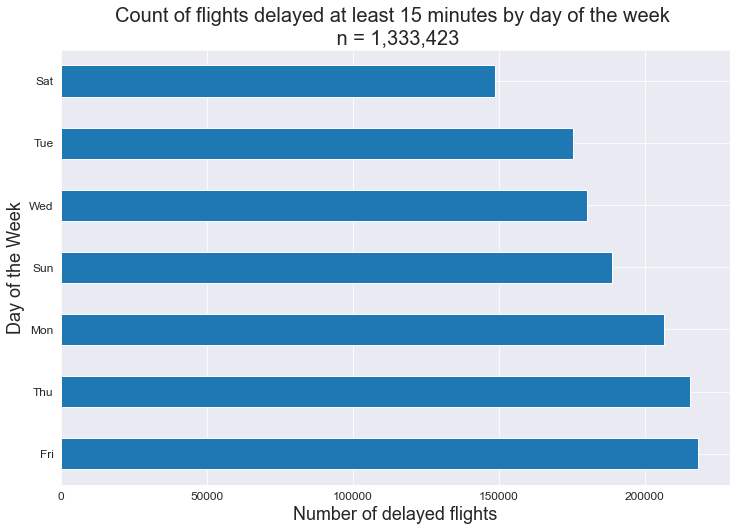

In [105]:
#counts of any delayed flight
round(delayed['day_of_week'].value_counts()).plot(kind = 'barh', figsize=(12,8))
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 15 minutes by day of the week \n n = {delayed.shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of the Week', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_daily_bar_15_min.pdf", bbox_inches="tight")

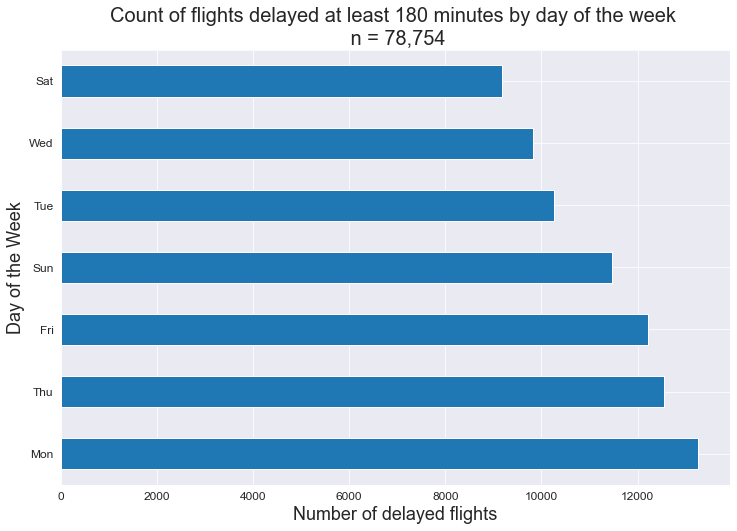

In [106]:
#counts of any delayed flight
round(delayed[delayed['arr_delay']>=180]['day_of_week'].value_counts()).plot(kind = 'barh', figsize=(12,8))
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 180 minutes by day of the week \n n = {delayed[delayed["arr_delay"]>=180].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of the Week', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_daily_bar_180_min.pdf", bbox_inches="tight")

In [108]:
flights.head(2)

,year,month,day_of_month,day_of_week,fl_date,airline,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,Sep,4,Fri,2020-09-04,Southwest Airlines,N8529Z,363,MDW,"Chicago, IL",DTW,"Detroit, MI",1350,1404.0,14.0,1600,1555.0,0.0,0.0,completed_flight,228.0,0.0,0.0,0.0,0.0,0.0
1,2017,Feb,10,Fri,2017-02-10,American Airlines,N3KJAA,2586,ORD,"Chicago, IL",SFO,"San Francisco, CA",1659,1702.0,3.0,1942,2006.0,24.0,0.0,completed_flight,1846.0,0.0,0.0,24.0,0.0,0.0


#### Discussion
There doesn't appear to be a day-to-day difference in the mean delay in the sample data. 
There is an apparent advantage to flying on Saturday, but let's consider the scale of the chart and the actual difference between the highest mean delay on a Saturday vs on a Friday. 

### EDA: Airline and Airports on Arrival Delay (`arr_delay`):
We can review other columns that are specific to company (the airline) and to location (the origin and destination airports) and to the duration of the flight (distance).

#### EDA: Airline Performance
---
Here I present a baseline analysis on the `airline` column and look at delays by airline by length of delay. We will look at cause of delay later in a deeper look to understand what does the proportionality looks like.

In [109]:
delayed['airline'].value_counts()

Southwest Airlines    282958
American Airlines     205657
Skywest Airlines      158760
Delta Airlines        147806
United Airlines       124640
JetBlue                84830
Envoy Air              42804
Spirit Airlines        41643
Alaska Airlines        41254
Republic Airways       40495
PSA Airlines           38205
Frontier Airlines      34014
Mesa Air               30834
Endeavor Air           29013
Allegiant Air          18965
Hawaiian Airlines       9327
Horizon Air             2218
Name: airline, dtype: int64

In [110]:
delayed['arr_delay'].describe()

count    1.333423e+06
mean     6.667704e+01
std      8.483658e+01
min      1.600000e+01
25%      2.400000e+01
50%      4.000000e+01
75%      7.700000e+01
max      3.864000e+03
Name: arr_delay, dtype: float64

In [111]:
#set the order from lowest to highest arrival delay by 3 quartile values
my_order = delayed.groupby(by=["airline"])["arr_delay"].quantile(.75).sort_values(ascending = True).index
my_order

Index(['Hawaiian Airlines', 'Horizon Air', 'Alaska Airlines',
       'Southwest Airlines', 'Envoy Air', 'American Airlines',
       'Delta Airlines', 'Allegiant Air', 'Spirit Airlines',
       'Republic Airways', 'Frontier Airlines', 'PSA Airlines',
       'United Airlines', 'JetBlue', 'Skywest Airlines', 'Endeavor Air',
       'Mesa Air'],
      dtype='object', name='airline')

                   arr_delay                         
                        size   min     max       mean
airline                                              
Alaska Airlines        41254  16.0   892.0  50.227081
Allegiant Air          18965  16.0  1728.0  74.282995
American Airlines     205657  16.0  3864.0  66.165912
Delta Airlines        147806  16.0  1272.0  69.216913
Endeavor Air           29013  16.0  2560.0  79.372385
Envoy Air              42804  16.0  1670.0  63.215657
Frontier Airlines      34014  16.0  1127.0  70.757776
Hawaiian Airlines       9327  16.0  2475.0  43.495658
Horizon Air             2218  16.0   528.0  48.249775
JetBlue                84830  16.0  1461.0  73.288459
Mesa Air               30834  16.0  1644.0  80.785821
PSA Airlines           38205  16.0  1888.0  69.653789
Republic Airways       40495  16.0  1353.0  69.051513
Skywest Airlines      158760  16.0  2695.0  81.126896
Southwest Airlines    282958  16.0   809.0  52.016335
Spirit Airlines        41643

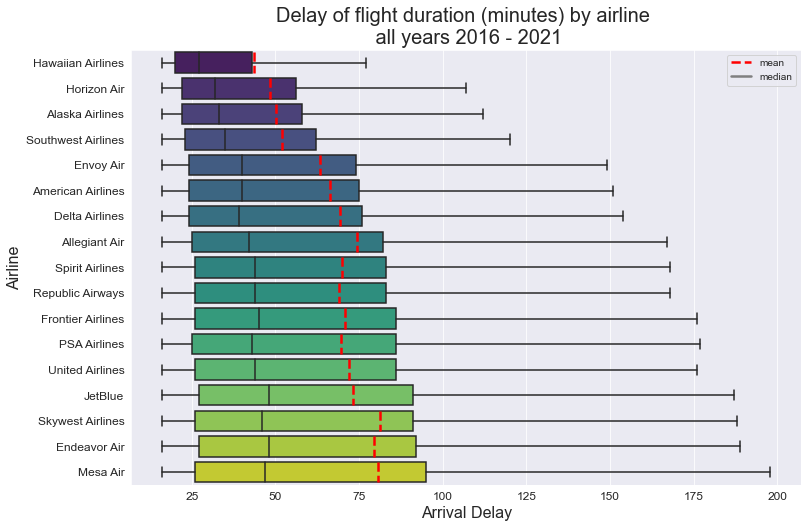

In [112]:
group4= delayed.groupby(['airline']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group4)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')
plt.title('Delay of flight duration (minutes) by airline \n all years 2016 - 2021' , size = 20)
year = sns.boxplot(y="airline", x="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
                   palette = 'viridis', order = my_order,
                   
            meanprops = meanlineprops)

#sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='red', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.yticks(fontsize = 12)
plt.ylabel('Airline', size = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Arrival Delay', size = 16)

plt.legend()
plt.savefig("../Assets/delays_airline_15_min.pdf", bbox_inches="tight")

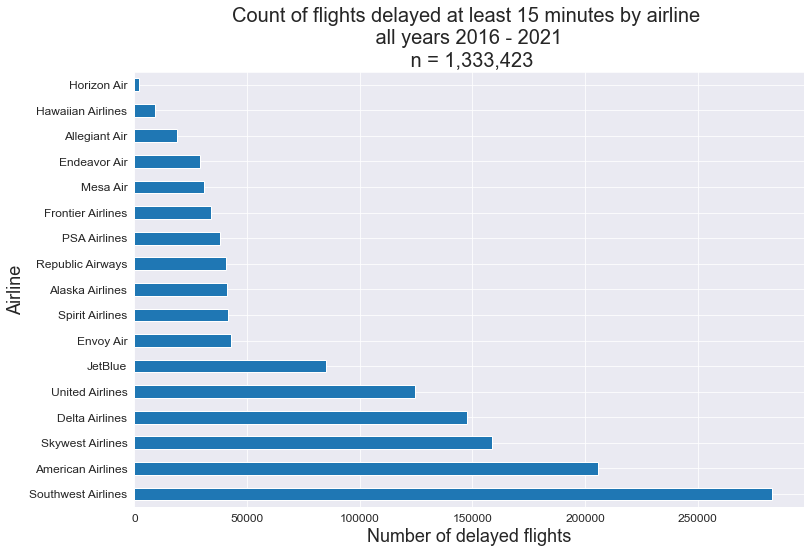

In [113]:
#counts of any delayed flight
round(delayed['airline'].value_counts()).plot(kind = 'barh', figsize=(12,8))
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 15 minutes by airline \n all years 2016 - 2021 \n n = {delayed[delayed["arr_delay"]>=15]["airline"].count() :,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Airline', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_airline_bar_15_min.pdf", bbox_inches="tight")

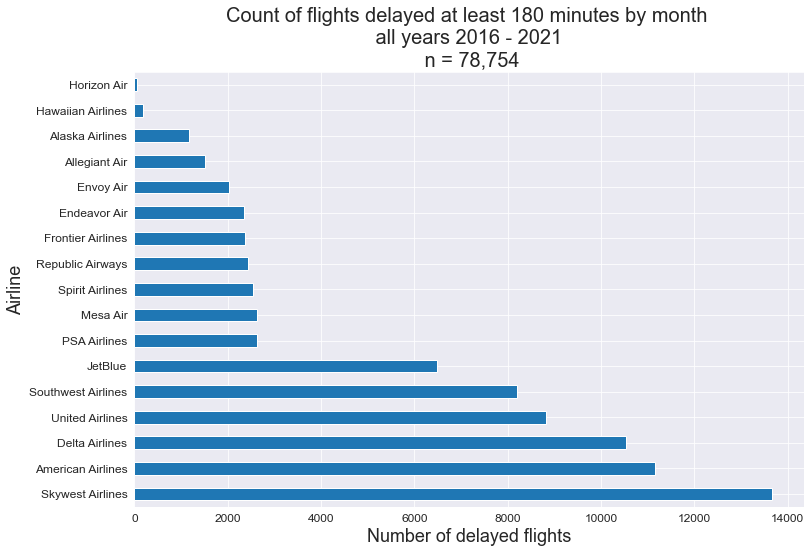

In [114]:
#counts of any delayed flight
round(delayed[delayed['arr_delay']>=180]['airline'].value_counts()).plot(kind = 'barh', figsize=(12,8))
sns.set_style('darkgrid')
plt.title(f'Count of flights delayed at least 180 minutes by month \n all years 2016 - 2021 \n n = {delayed[delayed["arr_delay"]>=180]["airline"].count() :,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Airline', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_airline_bar_180_min.pdf", bbox_inches="tight")

#### EDA: Airport Performance
---
A light view on the airports where delayed flights occurred most. 
How many airports exist in the transportation network?
Often we would think of this in terms of a network to analyze performance across the whole system. However, here we just want to know the number of unique nodes involved in airline delays.

In [116]:
#how many airports are there ?
delayed['origin'].nunique()

381

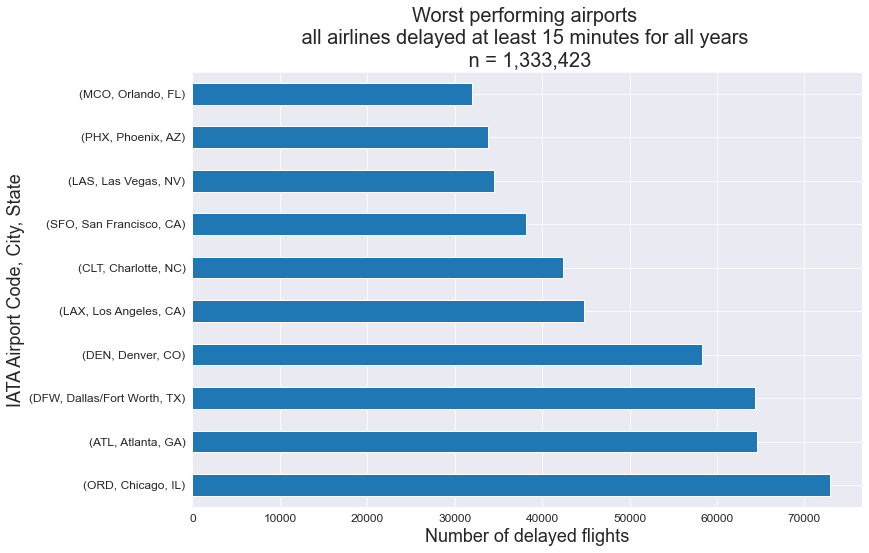

In [117]:
#bottom 10 airports (frequency) for delays, most delayed
sns.set_style('darkgrid')
delayed[['origin', 'origin_city_name']].value_counts().head(10).sort_values(ascending = False).plot(kind = 'barh', figsize = (12,8));
plt.title(f'Worst performing airports \n all airlines delayed at least 15 minutes for all years  \n n = {delayed["arr_delay"].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('IATA Airport Code, City, State', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_airport_worst_min.pdf", bbox_inches="tight")

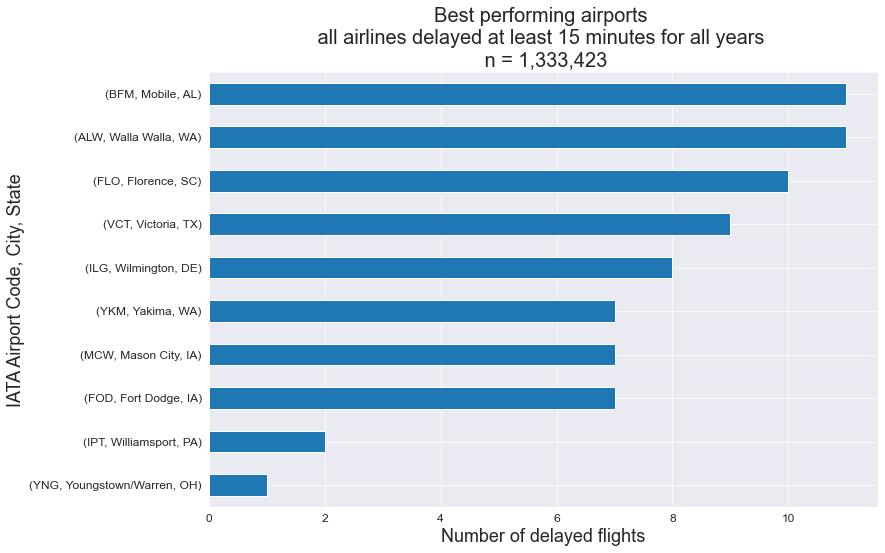

In [118]:
#top 10 airports (frequency) for delays, least delays
sns.set_style('darkgrid')
delayed[['origin', 'origin_city_name']].value_counts().tail(10).sort_values().plot(kind = 'barh', figsize= (12,8))
plt.title(f'Best performing airports \n all airlines delayed at least 15 minutes for all years  \n n = {delayed["arr_delay"].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('IATA Airport Code, City, State', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_airport_Best_min.pdf", bbox_inches="tight")

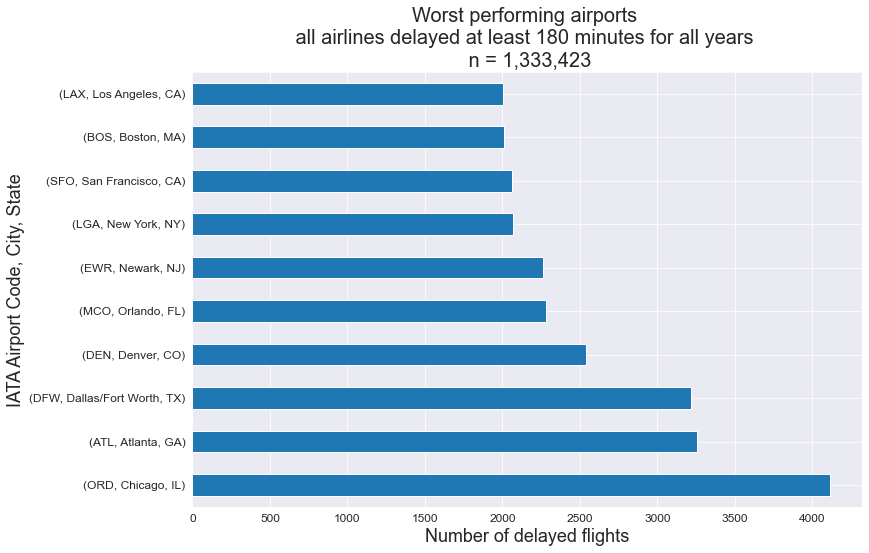

In [119]:
delayed[delayed['arr_delay'] >= 180][['origin', 'origin_city_name']].value_counts().head(10).sort_values(ascending = False).plot(kind = 'barh', figsize = (12,8));
sns.set_style('darkgrid')
plt.title(f'Worst performing airports \n all airlines delayed at least 180 minutes for all years  \n n = {delayed["arr_delay"].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('IATA Airport Code, City, State', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_airport_worst_180min.pdf", bbox_inches="tight")

## 4. Feature Engineering

### Feature Engineering: Delay Classes. 
----
It looks as though there were around the same average amount of delay, despite outliers.
Would this average change if we were to define delay _buckets_ ? 

* 0-15 minutes is a negligible delay. We can think of this class as being the not delayed class. This matters less because ticket booking engines contain information that describes an airport's _minimum connection time_ or time the airport has declared one would need, at a minimum, to traverse the concourse(s) to arrive at some other part of the airport. This is set up so passengers are set up for a successful connection. Thus, a ticket agent cannot book a ticket for a passenger with fewer minutes between scheduled arrival time and the next scheduled departure time. Encoded as `cl_delayed` where 1 if the flight arrived outside of its 15-minute arrival window, 0 if the flight arrived early or was within the arrival window  

* 15 - 60 minutes, minor delays, may impact tight connections. Encoded as `cl_sm_delay`

* 61 - 120 minutes, moderate delay, very likely to impact connecting flights or end of flight operations (like parking at an available gate) Encoded as `cl_mod_delay`

* 121 - 180 minutes, long delay. Depending on cause and airline, passenger may be able to make free arrangements to get back on track. Encoded as `cl_lg_delay`

* 181 - 240 minutes very long delay. Significant downline impacts. Lost time at destination, missed connections, depending on routing may also mean overnight stay at some connection point. Encoded as `cl_xl_delay`.

* 241+ minutes / Canceled . Extreme delay. This is anything greater than 4 hours in length or the flight itself is canceled outright. 



### Creating the classes.
---
Here are the steps taken to create each class on the `sample_model` dataframe. 

In [224]:
def delays(x):
    #the series of arr_time comes in
    if (x > 15 and x<=60):
        return '1_sm_delay'
    elif (x > 60 and x<=120):
        return '2_mod_delay'
    elif (x > 120 and x<=180):
        return '3_lg_delay'
    elif (x > 180 and x<=240):
        return '4_xl_delay'
    elif (x > 240 or x==-1):
        return '5_cl_xtreme_delay'
    else:
        return 'no delay'

In [225]:
flights['delay_class'] = flights['arr_delay'].apply(delays)

### Class balances
---
What I have done is create sub-classes on the delayed class. This illuminates different categories of delays but also has a big drawback, it creates an unbalanced data set for which we are to model. 

First lets determine what we are dealing with here initially by looking and visualizing various system performance metrics. 

Then we will attempt to balance our classes just prior to modeling. 

In [123]:
flights['delay_class'].value_counts( ascending = False)

no delay             1345806
1_sm_delay            889531
2_mod_delay           272435
5_cl_xtreme_delay      96514
3_lg_delay             93684
4_xl_delay             37685
Name: delay_class, dtype: int64

In [124]:
flights['delay_class'].value_counts( normalize = True)

no delay             0.491950
1_sm_delay           0.325162
2_mod_delay          0.099587
5_cl_xtreme_delay    0.035280
3_lg_delay           0.034246
4_xl_delay           0.013775
Name: delay_class, dtype: float64

Our sample data set contains 1,395,432 flights that were on-time and 1,442,124 that were delayed by any amount of time of 1 minute or greater. 
of the two-and-a-half million delayed flights in the sample: our breakdown is like this, 

|**Delay Class**|**Class Name**|**Count**|**Proportion of <br> delayed flights**|
|---|---|---|---|
|_15 - 60 min_| _Small Delay_| 889,171| 31.34%|
|_61 - 120 min_| _Moderate Delay_ | 272,559|9.61%|
|_121 - 180 min_| _Large Delay_ |93,794|3.31%|
|_181 - 240 min_| _Outsized (XL) Delay_|37,990|1.34%|
|_240+ min_| _Extreme Delay or Canceled_|98,498| 3.47%|

Now I will encode new columns as dummy variables in the usual way. 

In [126]:
flights.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'airline',
       'tail_num', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'delay_class'],
      dtype='object')

In [226]:
#save copy of cleaned sample dataframe without dummies transformations.
flights.to_csv('flights_processed_ex_dummies.csv', index = False)

In [128]:
flights = pd.get_dummies(flights, columns = ['delay_class'])

In [129]:
flights.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'airline',
       'tail_num', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_class_1_sm_delay', 'delay_class_2_mod_delay',
       'delay_class_3_lg_delay', 'delay_class_4_xl_delay',
       'delay_class_5_cl_xtreme_delay', 'delay_class_no delay'],
      dtype='object')

In [130]:
#save copy of cleaned sample dataframe
flights.to_csv('flights_processed_w_dummies.csv', index = False)

### Feature Engineering: Markets (origin - destination pairs).
---
A flights delay or schedule deviation can happen anywhere along the flight's path from origin to destination. 

I would like to create a column for later investigation that combines our strings from `origin` and `destination` we might be better to see what happens or if one city pair is 

In commercial passenger airline industry, we typically designate these pairs as a single _market_. 

So, stated slightly differently, we want to build a column that constructs our `markets` to determine which ones may be more susceptible to delays. 

In [227]:
cols = ['origin', 'dest']
flights['markets'] = flights[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [228]:
flights.head()

,year,month,day_of_month,day_of_week,fl_date,airline,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_class,markets
0,2020,Sep,4,Fri,2020-09-04,Southwest Airlines,N8529Z,363,MDW,"Chicago, IL",DTW,"Detroit, MI",1350,1404.0,14.0,1600,1555.0,0.0,0.0,completed_flight,228.0,0.0,0.0,0.0,0.0,0.0,no delay,MDW_DTW
1,2017,Feb,10,Fri,2017-02-10,American Airlines,N3KJAA,2586,ORD,"Chicago, IL",SFO,"San Francisco, CA",1659,1702.0,3.0,1942,2006.0,24.0,0.0,completed_flight,1846.0,0.0,0.0,24.0,0.0,0.0,1_sm_delay,ORD_SFO
2,2017,May,7,Sun,2017-05-07,Skywest Airlines,N614SK,4646,TUS,"Tucson, AZ",LAX,"Los Angeles, CA",1704,1841.0,97.0,1850,2032.0,102.0,0.0,completed_flight,451.0,0.0,96.0,5.0,0.0,1.0,2_mod_delay,TUS_LAX
3,2016,Feb,10,Wed,2016-02-10,Delta Airlines,N988AT,1942,EWR,"Newark, NJ",ATL,"Atlanta, GA",1532,2122.0,350.0,1814,2323.0,309.0,0.0,completed_flight,746.0,0.0,0.0,0.0,0.0,309.0,5_cl_xtreme_delay,EWR_ATL
4,2021,May,24,Mon,2021-05-24,PSA Airlines,N551NN,5095,AVP,"Scranton/Wilkes-Barre, PA",CLT,"Charlotte, NC",1520,1533.0,13.0,1732,1714.0,0.0,0.0,completed_flight,509.0,0.0,0.0,0.0,0.0,0.0,no delay,AVP_CLT


In [229]:
flights['markets'].value_counts()

LAX_SFO    6696
SFO_LAX    6479
ORD_LGA    5913
LGA_ORD    5506
LAX_JFK    4961
           ... 
ORD_BRO       1
ELP_CLT       1
BRO_DEN       1
IAD_BGR       1
MIA_JAN       1
Name: markets, Length: 7504, dtype: int64

In [135]:
#just slicing by distance and selecting the markets column
#counting flighs with more than 250 statute miles between origin and destination and showing what they are. 
flights[flights['distance'] >=250]['markets'].value_counts()

LAX_SFO    6696
SFO_LAX    6479
ORD_LGA    5913
LGA_ORD    5506
LAX_JFK    4961
           ... 
OMA_TPA       1
RNO_EWR       1
MIA_ROC       1
SEA_MSN       1
MIA_JAN       1
Name: markets, Length: 6791, dtype: int64

The key take away here is that not every airport connects to each other airport in the network. 
We have 380 unique airports in our sample data. 
If each airport connected to one another the network, in terms of markets, would be: $$ 380 ^ {380} $$ 

However, if we count the number of pairs, I think we can reduce the complexity of the problem that the algorithm sees. That is, creating a dummy variable for each of the sampled _markets_ (_pairs_) we just introduce 6,802 new columns

I will test this out if the model performance demands more complexity to avoid overfit. 

In [136]:
#flights = pd.get_dummies(flights, columns=['markets'], prefix = 'market')

In [137]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735655 entries, 0 to 2735654
Data columns (total 33 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   year                           object        
 1   month                          object        
 2   day_of_month                   object        
 3   day_of_week                    object        
 4   fl_date                        datetime64[ns]
 5   airline                        object        
 6   tail_num                       object        
 7   op_carrier_fl_num              object        
 8   origin                         object        
 9   origin_city_name               object        
 10  dest                           object        
 11  dest_city_name                 object        
 12  crs_dep_time                   object        
 13  dep_time                       object        
 14  dep_delay                      float64       
 15  crs_arr_time   

In [230]:
#save copy of cleaned sample dataframe without dummies transformations.
flights.to_csv('flights_processed_ex_dummies.csv', index = False)

In [138]:
#save copy of cleaned sample dataframe
flights.to_csv('flights_processed_w_dummies.csv', index = False)

### EDA: `origin` airport performance with delay classes
---
Do a quick examination on airport specific performance based on our new clasess we made. 

In [139]:
flights.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'airline',
       'tail_num', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_class_1_sm_delay', 'delay_class_2_mod_delay',
       'delay_class_3_lg_delay', 'delay_class_4_xl_delay',
       'delay_class_5_cl_xtreme_delay', 'delay_class_no delay', 'markets'],
      dtype='object')

In [141]:
delay_classes = ['delay_class_1_sm_delay', 
                'delay_class_2_mod_delay',
                'delay_class_3_lg_delay',
                'delay_class_4_xl_delay',
                'delay_class_5_cl_xtreme_delay']

In [142]:
airport = flights.groupby('origin')[delay_classes].sum().reset_index()

In [143]:
airport = airport.set_index('origin', drop =True)

In [144]:
airport['total_delays'] = airport.sum(axis = 1)

In [145]:
airport.columns

Index(['delay_class_1_sm_delay', 'delay_class_2_mod_delay',
       'delay_class_3_lg_delay', 'delay_class_4_xl_delay',
       'delay_class_5_cl_xtreme_delay', 'total_delays'],
      dtype='object')

In [146]:
worst_10 = airport.sort_values(by =['total_delays'], ascending = False).head(10).copy()
worst_10

,delay_class_1_sm_delay,delay_class_2_mod_delay,delay_class_3_lg_delay,delay_class_4_xl_delay,delay_class_5_cl_xtreme_delay,total_delays
origin,,,,,,
ORD,46777.0,16591.0,5512.0,2137.0,5201.0,76218.0
DFW,42995.0,13625.0,4548.0,1646.0,4841.0,67655.0
ATL,45421.0,11976.0,4019.0,1569.0,3822.0,66807.0
DEN,40128.0,11969.0,3725.0,1257.0,3078.0,60157.0
LAX,31454.0,8655.0,2708.0,1004.0,2264.0,46085.0
CLT,29353.0,8628.0,2724.0,906.0,2539.0,44150.0
SFO,24530.0,8648.0,2891.0,1134.0,2274.0,39477.0
LAS,24397.0,6543.0,2106.0,704.0,1691.0,35441.0
PHX,24505.0,6278.0,1855.0,658.0,1547.0,34843.0


In [147]:
worst_10_x = worst_10.drop(columns=['total_delays'])

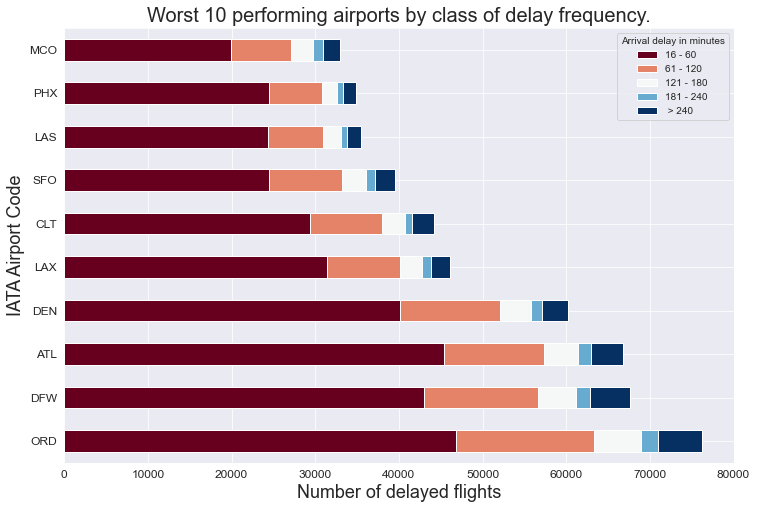

In [148]:
worst_10_x.plot(kind='barh', stacked =True, cmap = 'RdBu', figsize = (12,8));
sns.set_style('darkgrid')
plt.title('Worst 10 performing airports by class of delay frequency.', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('IATA Airport Code', size = 18 )
plt.yticks(fontsize = 12);
plt.legend(['16 - 60', '61 - 120', '121 - 180', '181 - 240', ' > 240'],title = 'Arrival delay in minutes')
plt.savefig("../Assets/STACKED_delays_airport_worst_all_delays.pdf", bbox_inches="tight")

### EDA: `airline` performance with delay classes
---
Do a quick examination on airline specific performance based on our new classes we made. 

In [150]:
#arilines
airlines = flights.groupby('airline')[delay_classes].sum().reset_index()

In [151]:
airlines = airlines.set_index('airline', drop =True)

In [152]:
airlines['total_delays'] = airlines.sum(axis = 1)

In [153]:
airlines = airlines.sort_values(by =['total_delays'], ascending = False).copy()
airline_x = airlines.drop(columns = ['total_delays'])

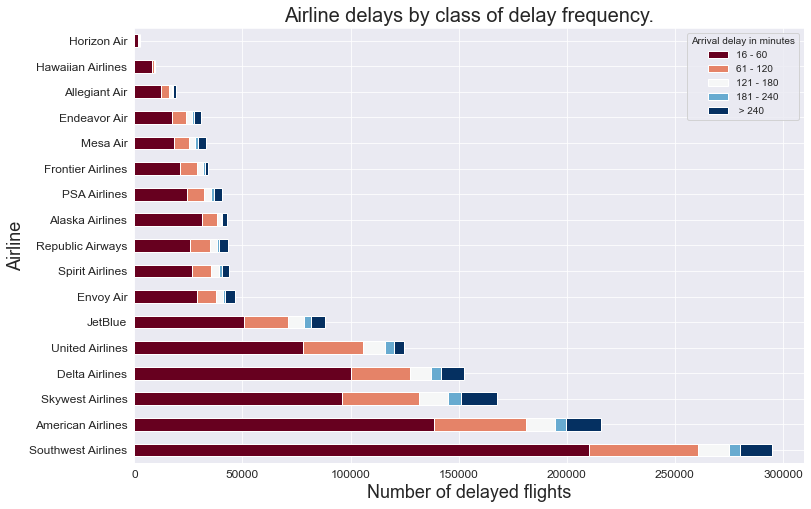

In [154]:
airline_x.plot(kind='barh', stacked =True, cmap = 'RdBu', figsize = (12,8));
sns.set_style('darkgrid')
plt.title('Airline delays by class of delay frequency.', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ticklabel_format(axis= 'x', useOffset = False, style = 'plain')
plt.ylabel('Airline', size = 18 )
plt.yticks(fontsize = 12);

plt.legend(['16 - 60', '61 - 120', '121 - 180', '181 - 240', ' > 240'],title = 'Arrival delay in minutes')
plt.savefig("../Assets/STACKED_delays_airline_worst_all_delays.pdf", bbox_inches="tight")

In [155]:
airlines_yr = flights.groupby([flights['fl_date'].dt.year, 'airline'])[delay_classes].sum()

In [156]:
airlines_yr['total_delay'] = airlines_yr[delay_classes].sum(axis = 1)

In [157]:
airlines_yr = airlines_yr.sort_values('total_delay', ascending= False).sort_index(level='fl_date', sort_remaining=False)

In [158]:
airlines_yr_x = airlines_yr.drop(columns=['total_delay'])

In [159]:
air_group =airlines_yr_x.groupby(level=0)

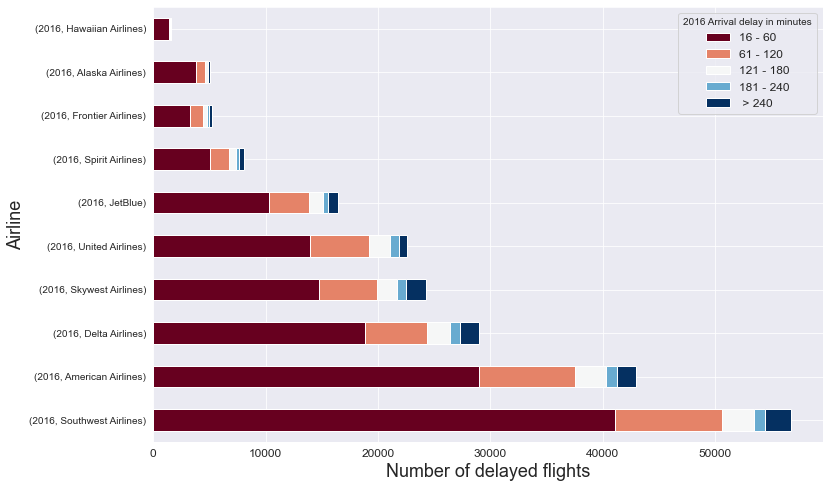

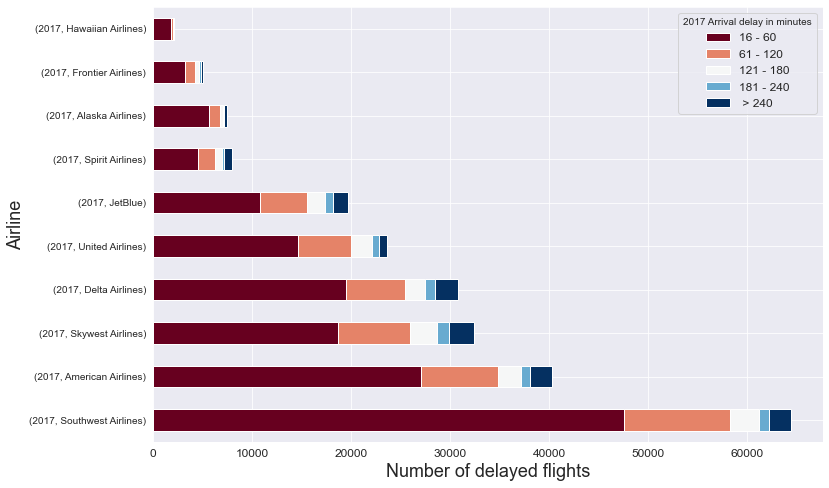

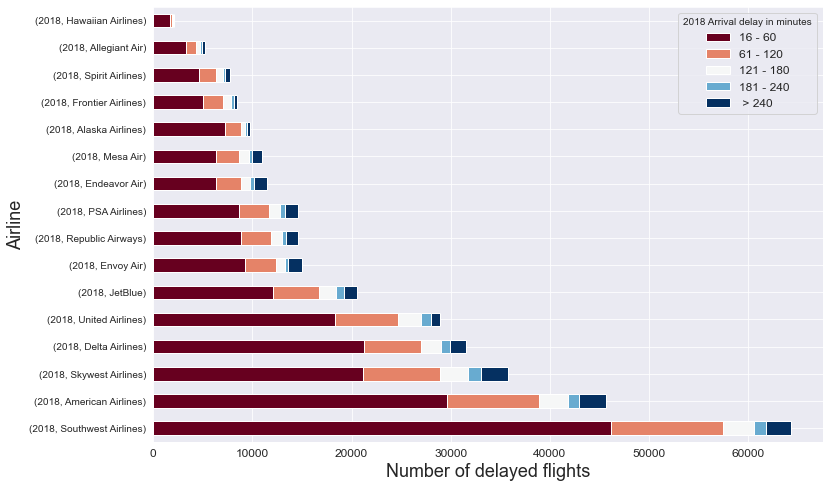

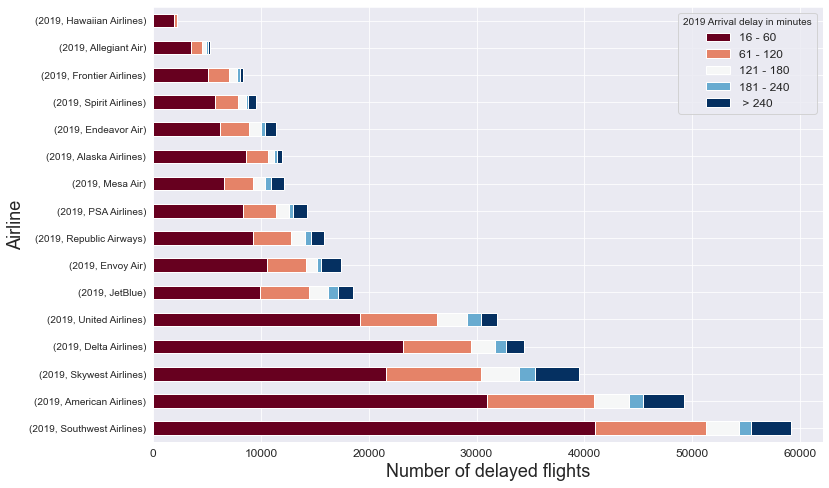

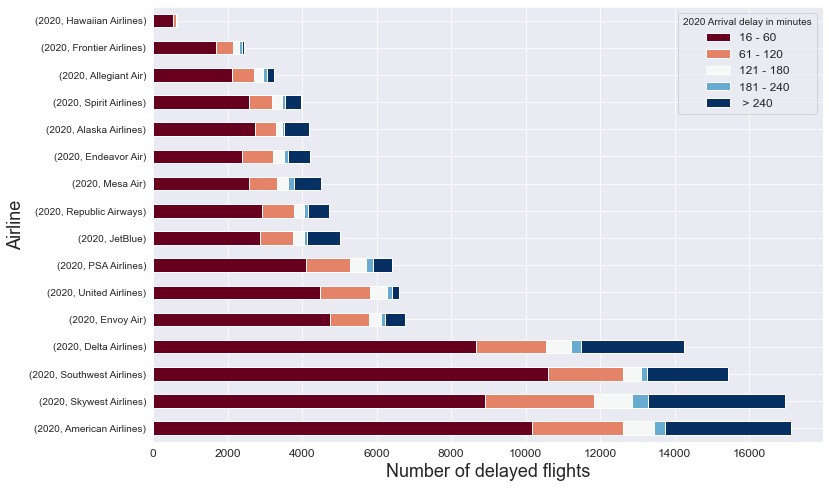

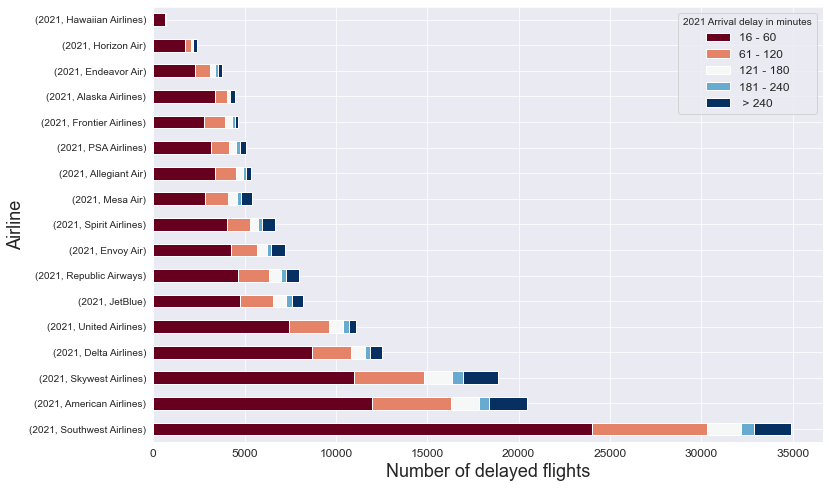

In [160]:
for yr, df_group in air_group:
    sns.set_style('darkgrid')
    df_group.groupby(level =0).plot(kind='barh', stacked =True, cmap = 'RdBu', figsize = (12,8));
    plt.xlabel('Number of delayed flights', size = 18 )
    plt.xticks(fontsize = 12, rotation = 0)
    plt.ticklabel_format(axis= 'x', useOffset = False, style = 'plain')
    plt.ylabel('Airline', size = 18 )
    plt.legend(['16 - 60', '61 - 120', '121 - 180', '181 - 240', ' > 240'],title = f'{yr} Arrival delay in minutes', fontsize = 12)
    plt.savefig(f"../Assets/STACKED_{yr}__airline.pdf", bbox_inches="tight")

In [231]:
flights.isnull().sum()

year                   0
month                  0
day_of_month           0
day_of_week            0
fl_date                0
airline                0
tail_num               0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
delay_class            0
markets                0
dtype: int64

### EDA: `airline` airport performance with delay types
---
Do a quick examination on airport specific performance based on each delay cause. 

In [162]:
delay_type_airline = flights.groupby([flights['fl_date'].dt.year, 'airline'])[['late_aircraft_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']].sum()

In [163]:
delay_type_airline['total_delay_minutes'] = delay_type_airline[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']].sum(axis=1)

In [164]:
delay_type_airline = delay_type_airline.sort_values('total_delay_minutes', ascending= False).sort_index(level='fl_date', sort_remaining=False)

In [165]:
#now sorted, remove total delay column. 
delay_type_airline_x = delay_type_airline.drop(columns=['total_delay_minutes'])

In [166]:
#create a group object to iterate over
air_type_group =delay_type_airline_x.groupby(level=0)

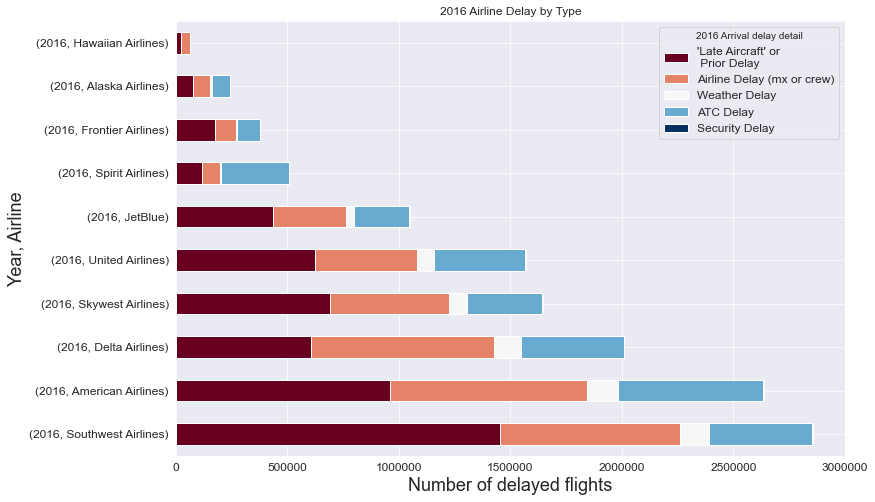

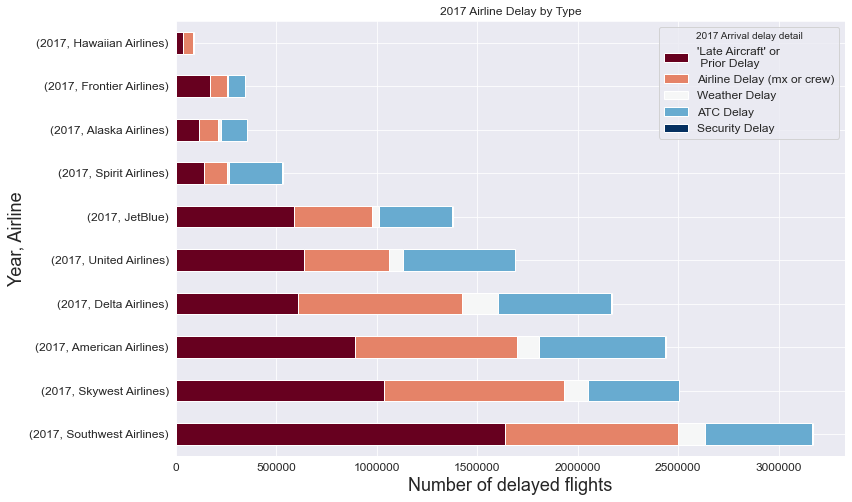

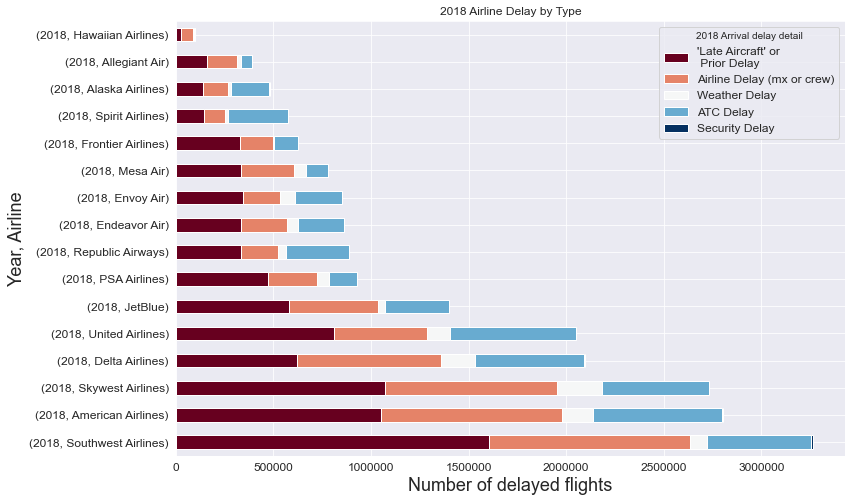

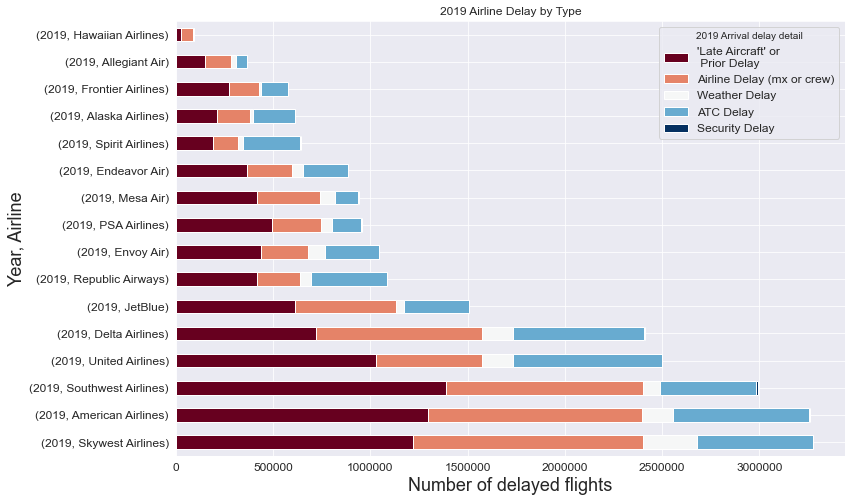

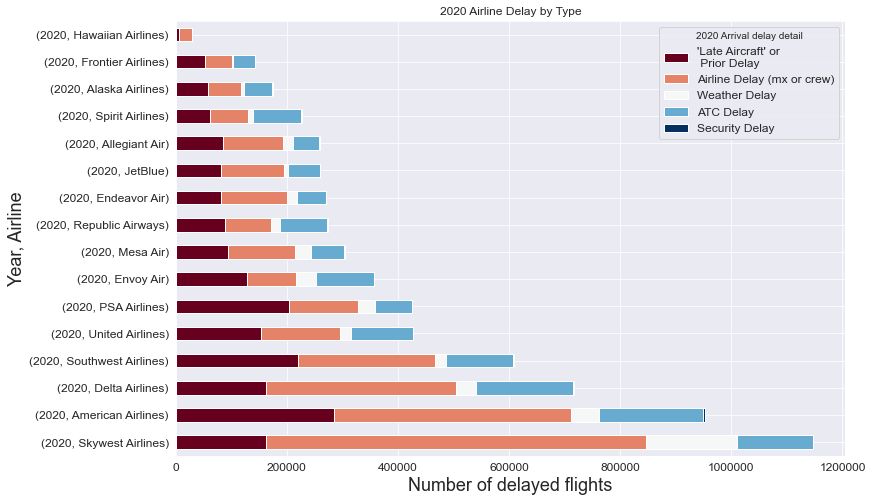

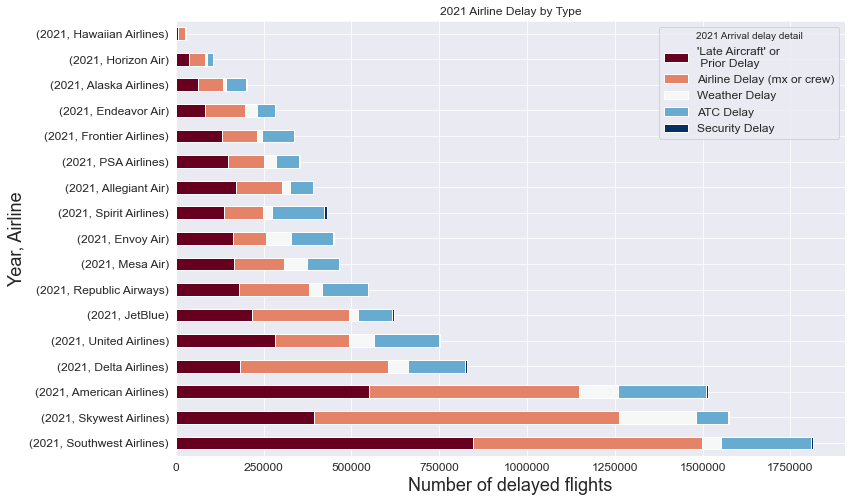

In [167]:
for yr, df_group in air_type_group:
    sns.set_style('darkgrid')
    df_group.groupby(level =0).plot(kind='barh', stacked =True, cmap = 'RdBu', figsize = (12,8), legend=True, title = f'{yr} Airline Delay by Type');
    plt.xlabel('Number of delayed flights', size = 18 )
    plt.xticks(fontsize = 12, rotation = 0)
    plt.ticklabel_format(axis= 'x', useOffset = False, style = 'plain')
    plt.ylabel('Year, Airline', size = 18 )
    plt.yticks(fontsize = 12);
    plt.legend(['\'Late Aircraft\' or\n Prior Delay','Airline Delay (mx or crew)', 'Weather Delay', 'ATC Delay', 'Security Delay'],title = f'{yr} Arrival delay detail', fontsize = 12)
    plt.savefig(f"../Assets/STACKED_detail_{yr}__airline.pdf", bbox_inches="tight")

In [168]:
flights.head(2)

,year,month,day_of_month,day_of_week,fl_date,airline,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_class_1_sm_delay,delay_class_2_mod_delay,delay_class_3_lg_delay,delay_class_4_xl_delay,delay_class_5_cl_xtreme_delay,delay_class_no delay,markets
0,2020,Sep,4,Fri,2020-09-04,Southwest Airlines,N8529Z,363,MDW,"Chicago, IL",DTW,"Detroit, MI",1350,1404.0,14.0,1600,1555.0,0.0,0.0,completed_flight,228.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,MDW_DTW
1,2017,Feb,10,Fri,2017-02-10,American Airlines,N3KJAA,2586,ORD,"Chicago, IL",SFO,"San Francisco, CA",1659,1702.0,3.0,1942,2006.0,24.0,0.0,completed_flight,1846.0,0.0,0.0,24.0,0.0,0.0,1,0,0,0,0,0,ORD_SFO


In [169]:
flights.isnull().sum()

year                             0
month                            0
day_of_month                     0
day_of_week                      0
fl_date                          0
airline                          0
tail_num                         0
op_carrier_fl_num                0
origin                           0
origin_city_name                 0
dest                             0
dest_city_name                   0
crs_dep_time                     0
dep_time                         0
dep_delay                        0
crs_arr_time                     0
arr_time                         0
arr_delay                        0
cancelled                        0
cancellation_code                0
distance                         0
carrier_delay                    0
weather_delay                    0
nas_delay                        0
security_delay                   0
late_aircraft_delay              0
delay_class_1_sm_delay           0
delay_class_2_mod_delay          0
delay_class_3_lg_del

#### EDA: `year`, `'origin'` and `airline` airport performance with delay types
---
Do a quick examination on airport specific performance based on each delay cause. 
This is not used in the model but maybe used in the application. 

In [170]:
delay_type_airport = flights.groupby([flights['fl_date'].dt.year, 'origin', 'airline'])[['late_aircraft_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']].sum()

In [171]:
delay_type_airport['total_delay_minutes'] = delay_type_airport[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']].sum(axis=1)

In [172]:
delay_type_airport = delay_type_airport.sort_values('total_delay_minutes', ascending= False).sort_index(level='fl_date', sort_remaining=False)

In [173]:
delay_type_airport.loc[:, 'SEA', : ].head(30)

late_aircraft_delay  carrier_delay  \
fl_date origin airline                                                  
2016    SEA    Alaska Airlines                 12806.0        29685.0   
               Skywest Airlines                16356.0        15269.0   
               Delta Airlines                  10665.0        17444.0   
               Southwest Airlines              17872.0        10111.0   
               American Airlines                9097.0        13489.0   
               United Airlines                  8258.0         7626.0   
               JetBlue                          4429.0         1890.0   
               Frontier Airlines                1300.0          860.0   
               Spirit Airlines                   627.0          620.0   
               Hawaiian Airlines                   0.0         1149.0   
2017    SEA    Alaska Airlines                 21605.0        37870.0   
               Skywest Airlines                23661.0        17996.0   
               Delta Airlines                  11936.0        15831.0   
               Southwest Airlines              17561.0         7620.0   
               United Airlines                  9020.0         6275.0   
               American Airlines                6074.0         8513.0   
               JetBlue                          5216.0         2987.0   
               Spirit Airlines                  1677.0         1062.0   
               Hawaiian Airlines                   0.0         1742.0   
               Frontier Airlines                1214.0          198.0   
2018    SEA    Alaska Airlines                 28445.0        32997.0   
               Delta Airlines                  15457.0        24889.0   
               United Airlines                 12262.0        10382.0   
               Southwest Airlines              20299.0         7495.0   
               Skywest Airlines                15902.0         6282.0   
               American Airlines                7614.0         6583.0   
               Spirit Airlines                  2703.0         2251.0   
               JetBlue                          3250.0         2780.0   
               Frontier Airlines                2897.0          969.0   
               Hawaiian Airlines                   0.0         2643.0   

                                   weather_delay  nas_delay  security_delay  \
fl_date origin airline                                                        
2016    SEA    Alaska Airlines            1657.0    29851.0            83.0   
               Skywest Airlines           2234.0     5381.0             0.0   
               Delta Airlines              882.0     8249.0             0.0   
               Southwest Airlines          461.0     5109.0            17.0   
               American Airlines          1014.0     4493.0             3.0   
               United Airlines             175.0     7169.0             0.0   
               JetBlue                     126.0     1711.0             0.0   
               Frontier Airlines             0.0     1523.0             0.0   
               Spirit Airlines               0.0     1024.0             0.0   
               Hawaiian Airlines            53.0       12.0             0.0   
2017    SEA    Alaska Airlines            5016.0    46500.0           379.0   
               Skywest Airlines           6402.0     7614.0           162.0   
               Delta Airlines             4552.0    13397.0           217.0   
               Southwest Airlines          814.0     3247.0            11.0   
               United Airlines             649.0     7932.0            54.0   
               American Airlines           952.0     4386.0            11.0   
               JetBlue                     113.0     2377.0             0.0   
               Spirit Airlines               6.0     3634.0            28.0   
               Hawaiian Airlines           230.0       83.0             0.0   
               Frontier Airlines       

In [174]:
flights.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'airline',
       'tail_num', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_class_1_sm_delay', 'delay_class_2_mod_delay',
       'delay_class_3_lg_delay', 'delay_class_4_xl_delay',
       'delay_class_5_cl_xtreme_delay', 'delay_class_no delay', 'markets'],
      dtype='object')

### Feature Engineering: dummy variable columns.
---
Now that we have some sense of what the data suggests in terms of flight delays, we can now encode some descriptive columns to see if they have any correlation with having a flight delay. 
I will encode the following columns: `month`, `day_of_month`, `day_of_week`, `airline`


In [175]:
flights = pd.get_dummies(flights, columns=['month'], prefix = 'MM')

In [176]:
flights = pd.get_dummies(flights, columns=['day_of_month'], prefix = 'DD')

In [177]:
flights = pd.get_dummies(flights, columns=['day_of_week'], prefix = 'wk')

In [178]:
flights = pd.get_dummies(flights, columns=['airline'], prefix = 'op') #operator of airline

In [232]:
flights.isnull().sum().sum()

0

## EDA: Correlation investigation
---
Correlations are presented after feature engineering primarily because I have some domain knowledge in the industry. Correlations here are problematic across many columns due to _data leakage_. Nevertheless, correlation tables are reported below on the full sample and then on the `delayed` subset.

In [181]:
cols = flights.describe().columns.to_list()
cols

['dep_delay',
 'arr_delay',
 'cancelled',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'delay_class_1_sm_delay',
 'delay_class_2_mod_delay',
 'delay_class_3_lg_delay',
 'delay_class_4_xl_delay',
 'delay_class_5_cl_xtreme_delay',
 'delay_class_no delay',
 'MM_Apr',
 'MM_Aug',
 'MM_Dec',
 'MM_Feb',
 'MM_Jan',
 'MM_Jul',
 'MM_Jun',
 'MM_Mar',
 'MM_May',
 'MM_Nov',
 'MM_Oct',
 'MM_Sep',
 'DD_1',
 'DD_10',
 'DD_11',
 'DD_12',
 'DD_13',
 'DD_14',
 'DD_15',
 'DD_16',
 'DD_17',
 'DD_18',
 'DD_19',
 'DD_2',
 'DD_20',
 'DD_21',
 'DD_22',
 'DD_23',
 'DD_24',
 'DD_25',
 'DD_26',
 'DD_27',
 'DD_28',
 'DD_29',
 'DD_3',
 'DD_30',
 'DD_31',
 'DD_4',
 'DD_5',
 'DD_6',
 'DD_7',
 'DD_8',
 'DD_9',
 'wk_Fri',
 'wk_Mon',
 'wk_Sat',
 'wk_Sun',
 'wk_Thu',
 'wk_Tue',
 'wk_Wed',
 'op_Alaska Airlines',
 'op_Allegiant Air',
 'op_American Airlines',
 'op_Delta Airlines',
 'op_Endeavor Air',
 'op_Envoy Air',
 'op_Frontier Airlines',
 'op_Hawaiian Airline

In [182]:
#all flights 
flights[cols].corr()

,dep_delay,arr_delay,cancelled,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_class_1_sm_delay,delay_class_2_mod_delay,delay_class_3_lg_delay,delay_class_4_xl_delay,delay_class_5_cl_xtreme_delay,delay_class_no delay,MM_Apr,MM_Aug,MM_Dec,MM_Feb,MM_Jan,MM_Jul,MM_Jun,MM_Mar,MM_May,MM_Nov,MM_Oct,MM_Sep,DD_1,DD_10,DD_11,DD_12,DD_13,DD_14,DD_15,DD_16,DD_17,DD_18,DD_19,DD_2,DD_20,DD_21,DD_22,DD_23,DD_24,DD_25,DD_26,DD_27,DD_28,DD_29,DD_3,DD_30,DD_31,DD_4,DD_5,DD_6,DD_7,DD_8,DD_9,wk_Fri,wk_Mon,wk_Sat,wk_Sun,wk_Thu,wk_Tue,wk_Wed,op_Alaska Airlines,op_Allegiant Air,op_American Airlines,op_Delta Airlines,op_Endeavor Air,op_Envoy Air,op_Frontier Airlines,op_Hawaiian Airlines,op_Horizon Air,op_JetBlue,op_Mesa Air,op_PSA Airlines,op_Republic Airways,op_Skywest Airlines,op_Southwest Airlines,op_Spirit Airlines,op_United Airlines
dep_delay,1.000000,0.978149,-0.067663,0.006346,0.680981,0.302058,0.250760,0.032619,0.581976,-0.035089,0.238482,0.305627,0.297017,0.384785,-0.432386,-0.008947,0.022919,0.003641,-0.002287,-0.006942,0.039298,0.031955,-0.023701,0.001521,-0.025880,-0.021691,-0.023931,0.002493,-0.001377,0.003731,-0.000710,0.000231,0.000899,0.004339,-0.001661,0.004265,0.005780,0.004386,0.002802,0.004808,0.004112,-0.000936,-0.004400,-0.002476,-0.005286,-0.002859,-0.004563,-0.001983,-0.005635,-0.000946,-0.000181,-0.000929,-0.007458,-0.005117,-0.000952,0.002615,0.003689,0.001940,0.010229,0.011741,-0.009116,0.002371,0.008404,-0.011580,-0.013735,-0.029291,0.014711,0.003161,-0.025005,-0.001299,-0.009401,0.019761,-0.024905,-0.009058,0.038322,0.018747,0.007286,-0.008110,0.030638,-0.035520,0.007985,0.016941
arr_delay,0.978149,1.000000,-0.071479,0.007116,0.671799,0.310281,0.347101,0.031583,0.564255,-0.010220,0.254943,0.314303,0.302244,0.385542,-0.470201,-0.010244,0.024066,0.004753,0.000249,-0.006793,0.039511,0.033378,-0.026309,0.001011,-0.027059,-0.022261,-0.024657,0.002530,-0.000909,0.004295,-0.000557,0.001263,0.000650,0.005433,-0.002205,0.005383,0.005660,0.004591,0.003551,0.005210,0.004215,-0.001959,-0.004760,-0.003092,-0.006496,-0.002543,-0.005535,-0.001616,-0.006580,-0.001351,-0.000205,-0.001266,-0.008360,-0.005624,0.000108,0.003651,0.003051,0.001853,0.010887,0.011571,-0.012171,0.000942,0.010726,-0.011500,-0.012417,-0.024615,0.016809,0.009304,-0.028154,-0.001324,-0.002234,0.019413,-0.023973,-0.009523,0.038666,0.020153,0.006906,-0.003216,0.033107,-0.049626,0.008694,0.017961
cancelled,-0.067663,-0.071479,1.000000,-0.035052,-0.033189,-0.012662,-0.043090,-0.003613,-0.047853,-0.100736,-0.048263,-0.027328,-0.017151,0.758876,-0.142805,0.030409,-0.001481,-0.015383,0.011798,0.008679,-0.010102,-0.011524,0.050855,-0.014639,-0.023721,-0.022115,-0.007991,-0.001052,-0.004242,0.002964,-0.004730,-0.000581,0.004162,0.002554,-0.003326,0.007581,0.000883,-0.000181,0.003746,0.000834,0.000929,-0.001328,0.000580,0.000090,-0.000878,-0.000732,0.001432,-0.003885,-0.002609,-0.000914,-0.000110,0.005165,-0.001501,-0.005601,-0.000022,0.003315,-0.000919,-0.000780,-0.003060,0.002930,-0.005351,-0.002229,-0.001257,0.003824,0.004917,-0.002086,-0.012845,0.013192,-0.022013,0.005022,0.027224,-0.020463,-0.013798,0.004108,0.007561,0.017496,0.009503,0.012948,0.016726,0.001830,0.009992,-0.044715
distance,0.006346,0.007116,-0.035052,1.000000,0.015030,-0.012075,0.032397,0.005920,-0.020683,0.036961,0.001561,-0.001340,-0.000593,-0.026961,-0.024992,-0.001243,0.004421,0.006039,-0.005778,-0.004905,0.010031,0.004678,0.002978,-0.002068,-0.004296,-0.006117,-0.006947,0.000698,-0.001017,-0.001925,-0.002636,-0.001557,0.000121,-0.000099,0.001207,0.001049,-0.001005,-0.000063,0.000906,0.000734,0.000493,-0.000337,-0.000664,-0.000371,0.000818,0.000360,-0.000690,0.000096,0.001464,0.000663,0.000917,0.000966,0.001186,0.000988,-0.000429,-0.000028,0.000093,-0.001497,-0.002124,-0.004326,0.021345,0.003550,-0.002861,-0.008085,-0.005936,0.143615,0.006254,0.125385,0.041170,-0.106276,-0.112834,0.049135,0.006270,-0.026668,0.107213,-0.062776,-0.121949,-0.076699,-0.212044,-0.070

In [183]:
flights[cols].isnull().sum().sum()

0

In [184]:
sample = flights.drop(columns = 'cancelled')

In [185]:
sample_num = flights.describe().columns.to_list()

In [186]:
delayed = flights[flights['arr_delay']>15][sample_num]

In [187]:
delayed.columns

Index(['dep_delay', 'arr_delay', 'cancelled', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_class_1_sm_delay', 'delay_class_2_mod_delay',
       'delay_class_3_lg_delay', 'delay_class_4_xl_delay',
       'delay_class_5_cl_xtreme_delay', 'delay_class_no delay', 'MM_Apr',
       'MM_Aug', 'MM_Dec', 'MM_Feb', 'MM_Jan', 'MM_Jul', 'MM_Jun', 'MM_Mar',
       'MM_May', 'MM_Nov', 'MM_Oct', 'MM_Sep', 'DD_1', 'DD_10', 'DD_11',
       'DD_12', 'DD_13', 'DD_14', 'DD_15', 'DD_16', 'DD_17', 'DD_18', 'DD_19',
       'DD_2', 'DD_20', 'DD_21', 'DD_22', 'DD_23', 'DD_24', 'DD_25', 'DD_26',
       'DD_27', 'DD_28', 'DD_29', 'DD_3', 'DD_30', 'DD_31', 'DD_4', 'DD_5',
       'DD_6', 'DD_7', 'DD_8', 'DD_9', 'wk_Fri', 'wk_Mon', 'wk_Sat', 'wk_Sun',
       'wk_Thu', 'wk_Tue', 'wk_Wed', 'op_Alaska Airlines', 'op_Allegiant Air',
       'op_American Airlines', 'op_Delta Airlines', 'op_Endeavor Air',
       'op_Envoy Air', 'op_Frontier Airlin

In [188]:
delayed = delayed.drop(columns = ['delay_class_no delay'])

In [189]:
delayed_rho = delayed.corr()
delayed_rho

,dep_delay,arr_delay,cancelled,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_class_1_sm_delay,delay_class_2_mod_delay,delay_class_3_lg_delay,delay_class_4_xl_delay,delay_class_5_cl_xtreme_delay,MM_Apr,MM_Aug,MM_Dec,MM_Feb,MM_Jan,MM_Jul,MM_Jun,MM_Mar,MM_May,MM_Nov,MM_Oct,MM_Sep,DD_1,DD_10,DD_11,DD_12,DD_13,DD_14,DD_15,DD_16,DD_17,DD_18,DD_19,DD_2,DD_20,DD_21,DD_22,DD_23,DD_24,DD_25,DD_26,DD_27,DD_28,DD_29,DD_3,DD_30,DD_31,DD_4,DD_5,DD_6,DD_7,DD_8,DD_9,wk_Fri,wk_Mon,wk_Sat,wk_Sun,wk_Thu,wk_Tue,wk_Wed,op_Alaska Airlines,op_Allegiant Air,op_American Airlines,op_Delta Airlines,op_Endeavor Air,op_Envoy Air,op_Frontier Airlines,op_Hawaiian Airlines,op_Horizon Air,op_JetBlue,op_Mesa Air,op_PSA Airlines,op_Republic Airways,op_Skywest Airlines,op_Southwest Airlines,op_Spirit Airlines,op_United Airlines
dep_delay,1.000000,0.973695,NaN,-0.019117,0.663421,0.294615,0.133309,0.023657,0.511521,-0.569458,0.100730,0.249637,0.273728,0.694398,0.002362,0.013041,-0.008759,-0.002671,-0.003559,0.026747,0.012511,-0.013828,0.001210,-0.016877,-0.016052,-0.008613,0.002192,-0.003411,0.004086,-0.003364,-0.003083,0.002135,0.000707,-0.004335,0.005229,0.003739,0.001894,0.004090,0.000471,0.000254,-0.001329,-0.005554,0.000986,0.000125,-0.002651,-0.003712,-0.001194,-0.003503,0.000976,-0.000055,0.001839,-0.002659,-0.002120,-0.000483,0.002606,0.005052,0.000685,-0.003439,0.011703,0.005924,0.006417,-0.005061,-0.004020,-0.011237,-0.041876,0.008895,-0.010747,0.010641,0.020959,-0.017481,0.009507,-0.025204,-0.008263,0.021817,0.024045,0.007368,-0.003126,0.058336,-0.066878,0.006567,0.018475
arr_delay,0.973695,1.000000,NaN,-0.016443,0.657250,0.306936,0.238211,0.021876,0.485774,-0.587331,0.106971,0.256806,0.280690,0.711499,0.001358,0.013143,-0.007727,0.001721,-0.002527,0.025053,0.012247,-0.016651,0.000303,-0.016987,-0.016027,-0.008021,0.002215,-0.002855,0.004901,-0.003313,-0.001770,0.001842,0.002052,-0.005328,0.006993,0.003276,0.001913,0.005273,0.000607,0.000061,-0.002941,-0.006087,0.000323,-0.001298,-0.002093,-0.005102,-0.000401,-0.004714,0.000527,-0.000184,0.001580,-0.003462,-0.002583,0.001243,0.004136,0.004017,0.000367,-0.003855,0.011042,0.002780,0.004576,-0.002931,-0.002986,-0.008632,-0.034646,0.010769,-0.002573,0.010571,0.022318,-0.007430,0.007782,-0.022933,-0.008866,0.020313,0.025587,0.006026,0.004953,0.062617,-0.089690,0.007039,0.020415
cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,-0.019117,-0.016443,NaN,1.000000,0.009967,-0.021653,0.032392,0.007134,-0.048996,0.024383,-0.015638,-0.011699,-0.006902,-0.006157,0.000583,0.006507,0.006565,-0.010581,-0.009487,0.008560,0.003203,0.006089,-0.002461,-0.004763,-0.005058,-0.003883,0.000658,-0.001682,-0.002311,-0.004627,-0.001636,0.001167,-0.000485,0.002131,0.002040,-0.001767,-0.000811,0.002579,0.000141,-0.000748,-0.001925,-0.002720,-0.000874,0.001653,-0.001044,-0.001441,-0.000096,0.002060,0.001736,0.000397,0.001957,0.001724,0.003953,0.001363,0.000276,0.002348,-0.002808,-0.004896,-0.007125,0.026047,-0.000130,-0.003337,-0.005058,-0.002409,0.132742,0.001081,0.123205,0.041749,-0.095760,-0.118729,0.052105,0.064973,-0.024360,0.115564,-0.071218,-0.129433,-0.076897,-0.214058,-0.080740,0.045487,0.182950
carrier_delay,0.663421,0.657250,NaN,0.009967,1.000000,-0.038476,-0.104777,-0.010278,-0.077673,-0.271054,0.019585,0.087248,0.106043,0.468281,0.001312,0.004697,-0.001072,-0.000385,0.001741,0.006803,-0.001432,0.000351,-0.005233,-0.003023,-0.003164,-0.003615,0.003085,-0.002747,-0.001584,0.000456,-0.003701,0.000482,-0.000607,-0.002512,0.001385,-0.000964,0.000119,-0.000217,-0.000452,-0.000529,0.000747,-0.003294,0.000620,0.002668,0.000048,0.000378,-0.000226,0.000900,0.000815,0.000707,0.002044,0.001595,0.000738,-

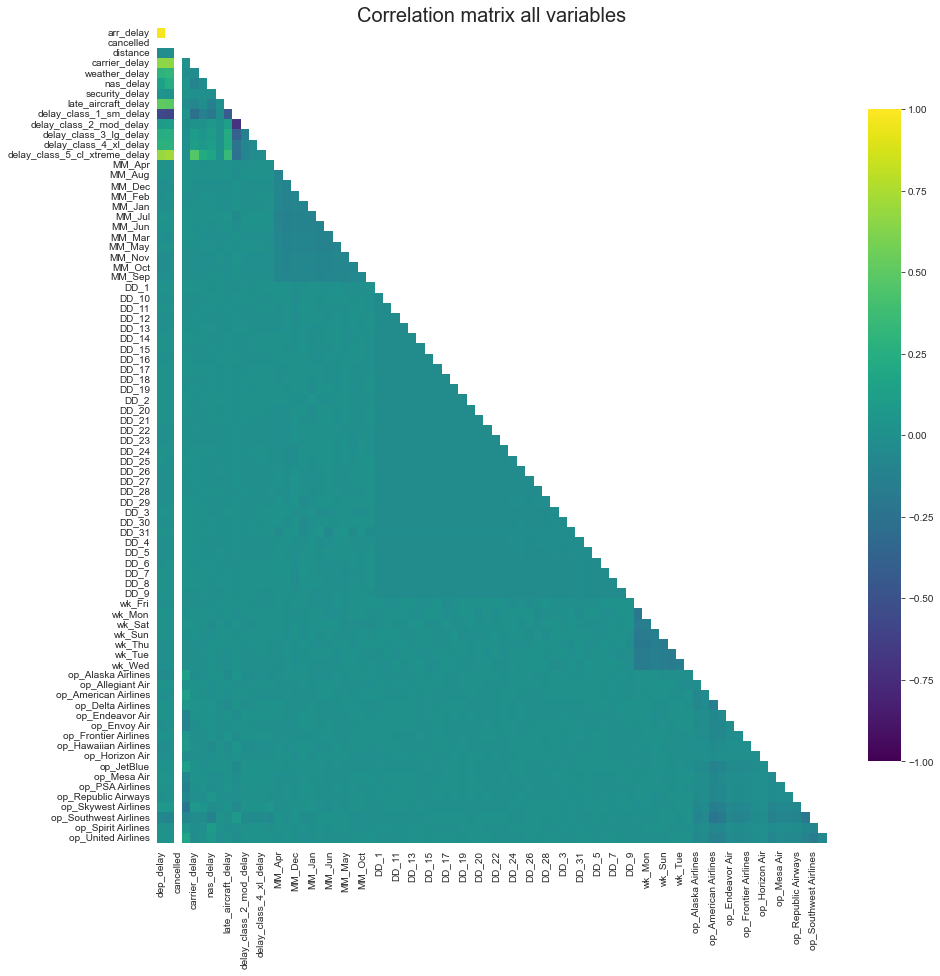

In [190]:
#init mask
mask =np.triu(np.ones_like(delayed_rho, dtype =np.bool_));
sns.set_style('white');
fig, ax = plt.subplots(figsize = (15,15));
#mask adjustment
mask = mask[1:, :-1];
corr = delayed_rho.iloc[1:, :-1].copy();
#heatmap
sns.heatmap(corr, mask =mask, cmap = 'viridis', vmin = -1, vmax= 1, cbar_kws={"shrink": .8});
plt.title('Correlation matrix all variables', size = 20);
plt.savefig(f"../Assets/correl_all_var.pdf", bbox_inches="tight");

In [192]:
flights.isnull().sum().sum()

0

Let's look at groups of variables against only our target, `arr_delay`

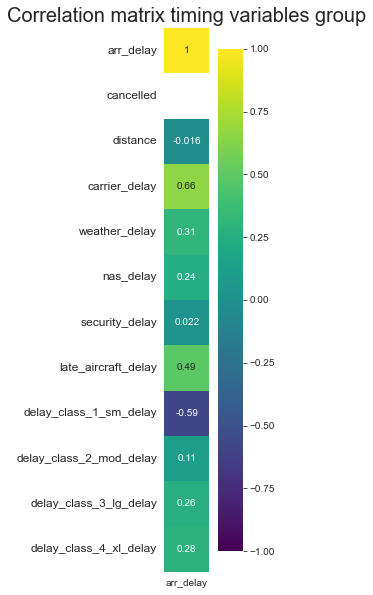

In [193]:
fig, ax = plt.subplots(figsize=(3,10))
#heatmap
sns.heatmap(corr[['arr_delay']][0:12],  annot =True, cmap = 'viridis', vmin = -1, vmax= 1, square = True)
plt.title('Correlation matrix timing variables group', size = 20)

plt.yticks(rotation = 0, fontsize =12)

plt.savefig(f"../Assets/correl_timing_var.pdf", bbox_inches="tight")

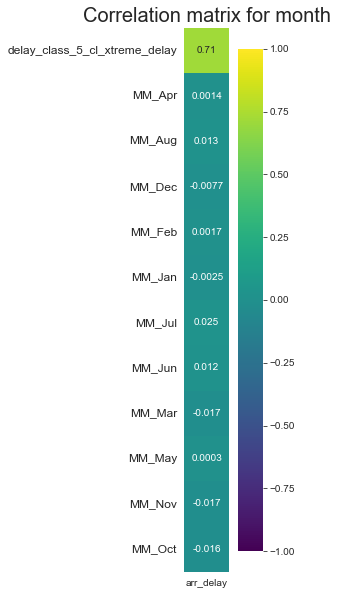

In [194]:
fig, ax = plt.subplots(figsize=(3,10))
#heatmap
sns.heatmap(corr[['arr_delay']][12:24],  annot =True, cmap = 'viridis', vmin = -1, vmax= 1, square = True)
plt.title('Correlation matrix for month', size = 20)

plt.yticks(rotation = 0, fontsize =12)

plt.savefig(f"../Assets/correl_Month_var.pdf", bbox_inches="tight")

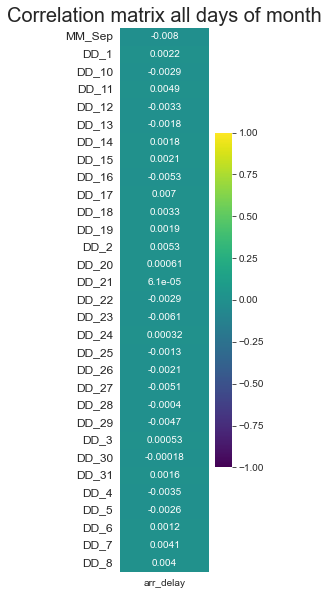

In [195]:
fig, ax = plt.subplots(figsize=(2,10))
#heatmap
sns.heatmap(corr[['arr_delay']][24:55],  annot =True, cmap = 'viridis', vmin = -1, vmax= 1, square = False)
plt.title('Correlation matrix all days of month', size = 20)

plt.yticks(rotation = 0, fontsize =12)
plt.savefig(f"../Assets/correl_timing_DD_var.pdf", bbox_inches="tight")

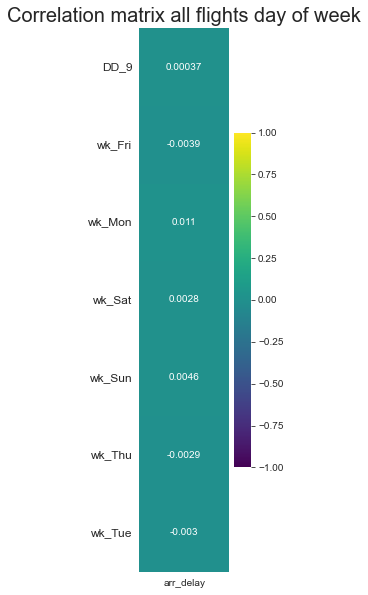

In [196]:
fig, ax = plt.subplots(figsize=(2,10))
#heatmap
sns.heatmap(corr[['arr_delay']][55:62],  annot =True, cmap = 'viridis', vmin = -1, vmax= 1, square = False)
plt.title('Correlation matrix all flights day of week', size = 20)

plt.yticks(rotation = 0, fontsize =12)
plt.savefig(f"../Assets/correl_WK_var.pdf", bbox_inches="tight")

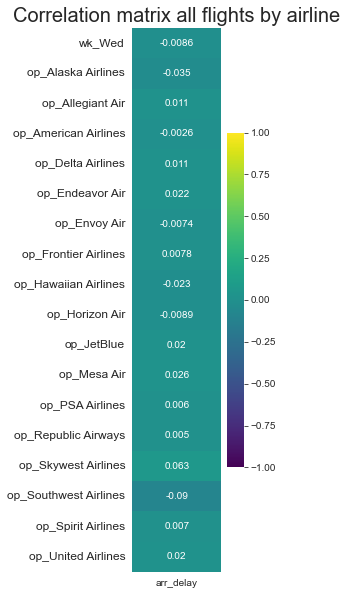

In [197]:
fig, ax = plt.subplots(figsize=(2,10))
#heatmap
sns.heatmap(corr[['arr_delay']][62:],  annot =True, cmap = 'viridis', vmin = -1, vmax= 1, square = False)
plt.title('Correlation matrix all flights by airline', size = 20)

plt.yticks(rotation = 0, fontsize =12)
plt.savefig(f"../Assets/correl_operator_var.pdf", bbox_inches="tight")

With the current collection of correlation analysis, it does not appear that features will be selected based on Pearson correlation values. 
The final dimension to examine would be airports. 

In [ ]:
### add refactored content from III to here. 

## Feature Engineering: airport dummy values
---
Let's revisit the airport markets column that generated a pair of origin - destination city pairs.  

In [198]:
flights['markets'].nunique()

7504

In [199]:
flights['origin'].nunique()

381

In [200]:
flights['dest'].nunique()

380

It looks as though we had found one flight where a flight was operated to a place but not from a place. 

It is possible that our sampling method picked up an inbound flight and no outbound flights for this airport. After some additional research, I found that I could use sklearns OHE that converts my markets column to a sparse matrix to save some memory. I will try it here

In [204]:
#test = flights.copy()

In [205]:
#from sklearn.preprocessing import OneHotEncoder

Holding off for now since this still needs to be modeled and tested 2x

In [203]:
flights.to_csv('flights_processed_w_dummies.csv', index = False)


# End of Notebook II.
----
Thank you for reviewing my code notebook for flight delay predictions. We are getting close to running a model and we will do so (a few times!!) in Notebook III

In [202]:
flights.isnull().sum().sum()

0

In [233]:
#save copy of cleaned sample dataframe without dummies transformations.
flights.to_csv('flights_processed_ex_dummies.csv', index = False)